In [245]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 20})

In [246]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Load Cleaned Data

In [247]:
trips = pd.read_csv('../Data/trips.csv') 
trips.head()

,Unnamed: 0,Trip ID,Membership Name,Bicycle ID,Bike Type,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month_orig,Year_orig,Checkout DateTime,Return DateTime,Year,Month,Weekday,Weekday_name,Checkout_Hour,Checkout_Min,Membership Type,Lat Checkout,Lon Checkout,Council District Checkout,Neighborhood Checkout,Neighborhood Group Checkout,Lat Return,Lon Return,Council District Return,Neighborhood Return,Neighborhood Group Return,Distance_Miles
0,0,9900285854,Annual (San Antonio B-cycle),207.0,NaN,10/26/2014,13:12:00,2537.0,6th/West,2707.0,Rainey/Cummings,76,10.0,2014.0,2014-10-26 13:12:00,2014-10-26 14:28:00,2014,10,7,Sunday,13,12,Other,30.27041,-97.75046,9.0,DOWNTOWN,DOWNTOWN,30.255906,-97.739949,9.0,DOWNTOWN,DOWNTOWN,1.182257
1,1,9900285855,24-Hour Kiosk (Austin B-cycle),969.0,NaN,10/26/2014,13:12:00,2539.0,3rd/Trinity @ The Convention Center,2566.0,Electric Drive/Sandra Muraida Way @ Pfluger Pe...,58,10.0,2014.0,2014-10-26 13:12:00,2014-10-26 14:10:00,2014,10,7,Sunday,13,12,Day,30.26426,-97.74023,9.0,DOWNTOWN,DOWNTOWN,30.267170,-97.754840,9.0,DOWNTOWN,DOWNTOWN,0.894747
2,2,9900285856,Annual Membership (Austin B-cycle),214.0,NaN,10/26/2014,13:12:00,2537.0,6th/West,2496.0,8th/Congress,8,10.0,2014.0,2014-10-26 13:12:00,2014-10-26 13:20:00,2014,10,7,Sunday,13,12,Annual,30.27041,-97.75046,9.0,DOWNTOWN,DOWNTOWN,30.269800,-97.741860,9.0,DOWNTOWN,DOWNTOWN,0.514917
3,3,9900285857,24-Hour Kiosk (Austin B-cycle),745.0,NaN,10/26/2014,13:12:00,2574.0,Zilker Park,2574.0,Zilker Park,28,10.0,2014.0,2014-10-26 13:12:00,2014-10-26 13:40:00,2014,10,7,Sunday,13,12,Day,30.26590,-97.76822,8.0,BARTON HILLS,SOUTH AUSTIN,30.265900,-97.768220,8.0,BARTON HILLS,SOUTH AUSTIN,0.000000
4,4,9900285858,24-Hour Kiosk (Austin B-cycle),164.0,NaN,10/26/2014,13:12:00,2538.0,Bullock Museum @ Congress & MLK,2539.0,3rd/Trinity @ The Convention Center,15,10.0,2014.0,2014-10-26 13:12:00,2014-10-26 13:27:00,2014,10,7,Sunday,13,12,Day,30.28039,-97.73809,1.0,DOWNTOWN,DOWNTOWN,30.264260,-97.740230,9.0,DOWNTOWN,DOWNTOWN,1.121769


In [248]:
kiosk = pd.read_csv('../Data/kiosk.csv') 
kiosk.head()

,Unnamed: 0,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,Footprint Length,Footprint Width,Notes,Council District,Image,Modified Date,Latitude,Longitude,geometry,Neighborhood,Neighborhood Group,Lat,Lon
0,0,2823,East 5th/Broadway @ Capital Metro HQ,active,"(30.2563, -97.71007)",2910 E 5th St,NaN,16684.0,undetermined_parking,13.0,solar,40.0,5.0,NaN,3,NaN,01/04/2021 12:00:00 AM,30.256300,-97.710070,POINT (-97.71007 30.2563),GOVALLE,EAST AUSTIN,30.256300,-97.710070
1,1,3291,11th/San Jacinto,active,"(30.27193, -97.73854)",310 E. 11th St.,NaN,32503.0,sidewalk,11.0,solar,35.0,5.0,NaN,1,NaN,01/04/2021 12:00:00 AM,30.271930,-97.738540,POINT (-97.73854 30.27193),DOWNTOWN,DOWNTOWN,30.271930,-97.738540
2,2,3292,East 4th/Chicon,active,"(30.25987, -97.72373)",1819 East 4th St.,NaN,32516.0,undetermined_parking,9.0,solar,30.0,5.0,NaN,3,NaN,01/04/2021 12:00:00 AM,30.259870,-97.723730,POINT (-97.72373 30.25987),EAST CESAR CHAVEZ,EAST AUSTIN,30.259870,-97.723730
3,3,3293,East 2nd/Pedernales,active,"(30.25542, -97.71665)",2414 E 2nd St,NaN,16729.0,nonmetered_parking,10.0,solar,20.0,15.0,Kiosk replaced by Barton Sp/Riverside. Old ci...,3,NaN,01/04/2021 12:00:00 AM,30.255420,-97.716650,POINT (-97.71665 30.25542),HOLLY,EAST AUSTIN,30.255420,-97.716650
4,4,3294,6th/Lavaca,active,"(30.268887, -97.745242)",601 Lavaca St.,NaN,32515.0,sidewalk,12.0,solar,25.0,8.0,"double sided, remeasure",9,NaN,03/04/2022 10:21:00 AM,30.268887,-97.745242,POINT (-97.745242 30.268887),DOWNTOWN,DOWNTOWN,30.268887,-97.745242


In [249]:
trips_2015 = trips.loc[trips['Year'].isin([2015])]
trips_2016 = trips.loc[trips['Year'].isin([2016])]
trips_2017 = trips.loc[trips['Year'].isin([2017])]
trips_2018 = trips.loc[trips['Year'].isin([2018])]
trips_2019 = trips.loc[trips['Year'].isin([2019])]
trips_2020 = trips.loc[trips['Year'].isin([2020])]
trips_2021 = trips.loc[trips['Year'].isin([2021])]
trips_2022 = trips.loc[trips['Year'].isin([2022])]
trips_recent = trips.loc[trips['Year'].isin([2020,2021,2022])]

# Visualizations


Colors, Sizes

In [250]:
color_navy = '#112e68'
color_light = '#e64e1f' #'#b3006a' #'#EC008C'
color_dark = '#cc0079' #'#6a2d94' 
color_grey = '#8e9294'

clrs = [color_navy,
 color_navy,
 color_navy,
 color_navy,
 color_navy,
 color_navy,
 color_navy,
 color_navy,
 color_light,
 color_dark]

bkg_color = '#dbe5f1' # the grid

ticks_size = 16
ticks_color = 'black'
ticks_weight = 'normal'

labeltxt_size = 16
labeltxt_color = 'black'
labeltxt_weight = 'bold'

figw = 9
figh = 5

### Figure 1

In [251]:
trips.groupby('Year').size()

Year
2013      1431
2014    153045
2015    180219
2016    182015
2017    190629
2018    381871
2019    110394
2020    102292
2021    223989
2022    299667
dtype: int64

In [271]:
trips_2022.groupby('Neighborhood Group Checkout').size().sort_values(ascending = False)

Neighborhood Group Checkout
UT AUSTIN AREA    154349
DOWNTOWN           72891
SOUTH AUSTIN       43557
EAST AUSTIN        21522
WEST AUSTIN         7316
dtype: int64

Median:  9.0
Average:  25.012704101552725
Mode:  0    4
dtype: int64
Average Dist:  0.7155512449466912


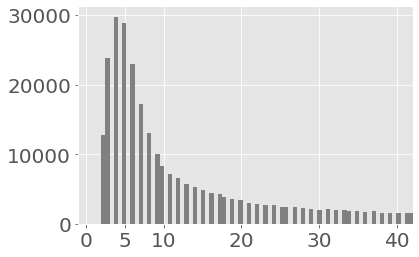

In [337]:
test_ut = trips_2022
plt.hist(test_ut['Trip Duration Minutes'], bins = 10000, color = 'gray');
plt.xlim(-1,42)
print('Median: ', test_ut['Trip Duration Minutes'].median())
print('Average: ', test_ut['Trip Duration Minutes'].mean())
print('Mode: ', test_ut['Trip Duration Minutes'].mode())
print('Average Dist: ', test_ut['Distance_Miles'].mean())

x = [0,5,10,20,30,40]
plt.xticks(x);

# UT Austin - 2022

Number of Trips:  154349
Number of Kiosks:  13
Avg. Trips/Kiosk:  11873.0 

Trip Duration (Minutes)
Average:  16.338810099190795
Median:  5.0
Mode:  0    4
dtype: int64

Distance (Miles)
Average:  0.5174704015659252
Mode:  0    0.452372
dtype: float64


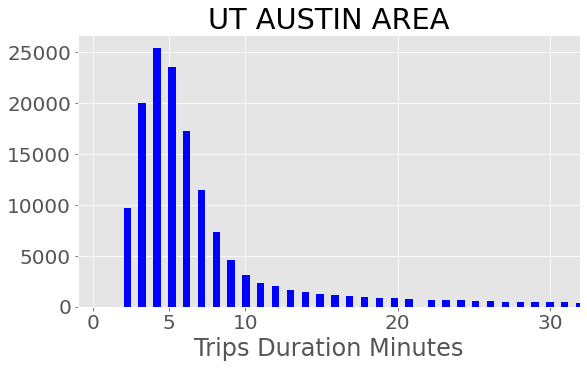

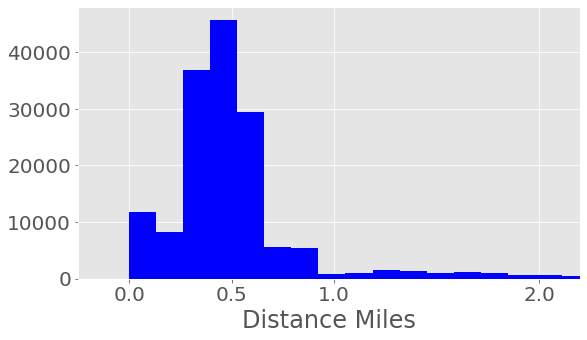

In [376]:
ntemp = 'UT AUSTIN AREA'
fig1,ax = plt.subplots(figsize = (figw,figh))
test = trips_2022.loc[trips_2022['Neighborhood Group Checkout']==ntemp]
plt.hist(test['Trip Duration Minutes'], bins = 10000, color = 'blue');
plt.xlim(-1,32)
x = [0,5,10,20,30]
plt.xticks(x);
plt.title(ntemp)
plt.xlabel('Trips Duration Minutes');

fig2,ax = plt.subplots(figsize = (figw,figh))
plt.hist(test['Distance_Miles'], bins = 30, color = 'blue');
plt.xlim(-0.25,2.2)
x = [0,0.5,1,2]
plt.xticks(x);
plt.xlabel('Distance Miles');

print('Number of Trips: ', test.shape[0])
print('Number of Kiosks: ', test['Checkout Kiosk ID'].nunique())
print('Avg. Trips/Kiosk: ',test.shape[0]/test['Checkout Kiosk ID'].nunique(),'\n')

print('Trip Duration (Minutes)')
print('Average: ', test['Trip Duration Minutes'].mean())
print('Median: ', test['Trip Duration Minutes'].median())
print('Mode: ', test['Trip Duration Minutes'].mode())

print('\nDistance (Miles)')
print('Average: ', test['Distance_Miles'].mean())
print('Mode: ', test['Distance_Miles'].mode())


In [380]:
test.groupby('Checkout Kiosk').size().sort_values(ascending = False)

Checkout Kiosk
21st/Speedway @ PCL                       33588
Dean Keeton/Speedway                      17758
26th/Nueces                               15202
Dean Keeton/Whitis                        13320
21st/Guadalupe                            12034
Guadalupe/West Mall @ University Co-op    11218
22nd/Pearl                                11134
23rd/Pearl                                 9476
28th/Rio                                   9463
23rd/San Jacinto @ DKR Stadium             7309
21st/University                            7144
22.5/Rio Grande                            4846
28th/Rio Grande                            1857
dtype: int64

In [381]:
test.groupby('Return Kiosk').size().sort_values(ascending = False)

Return Kiosk
21st/Speedway @ PCL                                              32483
Dean Keeton/Speedway                                             18180
26th/Nueces                                                      13271
Dean Keeton/Whitis                                               12273
Guadalupe/West Mall @ University Co-op                           10206
21st/Guadalupe                                                   10094
22nd/Pearl                                                        9151
28th/Rio                                                          8272
23rd/Pearl                                                        8062
23rd/San Jacinto @ DKR Stadium                                    7259
21st/University                                                   6367
22.5/Rio Grande                                                   4168
28th/Rio Grande                                                   1613
16th/San Antonio                                                

Number of Kiosks:  31 

Trip Duration (Minutes)
Average:  33.156192122484256
Median:  16.0
Mode:  0    7
dtype: int64

Distance (Miles)
Average:  0.7904040401820382
Mode:  0    0.0
dtype: float64


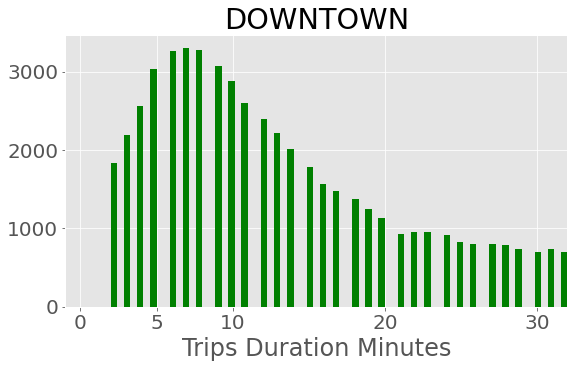

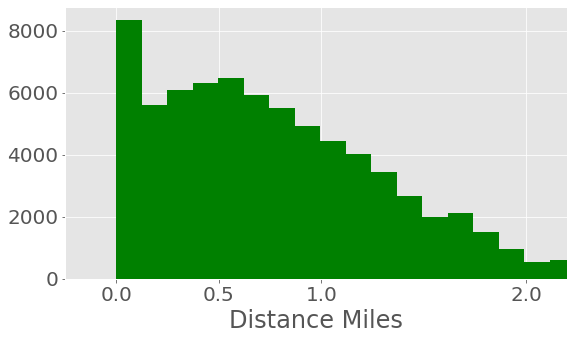

In [370]:
ntemp = 'DOWNTOWN'
fig1,ax = plt.subplots(figsize = (figw,figh))
test = trips_2022.loc[trips_2022['Neighborhood Group Checkout']==ntemp]
plt.hist(test['Trip Duration Minutes'], bins = 10000, color = 'green');
plt.xlim(-1,32)
x = [0,5,10,20,30]
plt.xticks(x);
plt.title(ntemp)
plt.xlabel('Trips Duration Minutes');

fig2,ax = plt.subplots(figsize = (figw,figh))
plt.hist(test['Distance_Miles'], bins = 30, color = 'green');
plt.xlim(-0.25,2.2)
x = [0,0.5,1,2]
plt.xticks(x);
plt.xlabel('Distance Miles');

print('Number of Kiosks: ', test['Checkout Kiosk ID'].nunique(),'\n')

print('Trip Duration (Minutes)')
print('Average: ', test['Trip Duration Minutes'].mean())
print('Median: ', test['Trip Duration Minutes'].median())
print('Mode: ', test['Trip Duration Minutes'].mode())

print('\nDistance (Miles)')
print('Average: ', test['Distance_Miles'].mean())
print('Mode: ', test['Distance_Miles'].mode())


Number of Kiosks:  19 

Trip Duration (Minutes)
Average:  37.29366117960374
Median:  22.0
Mode:  0    7
dtype: int64

Distance (Miles)
Average:  1.018782967987508
Mode:  0    0.0
dtype: float64


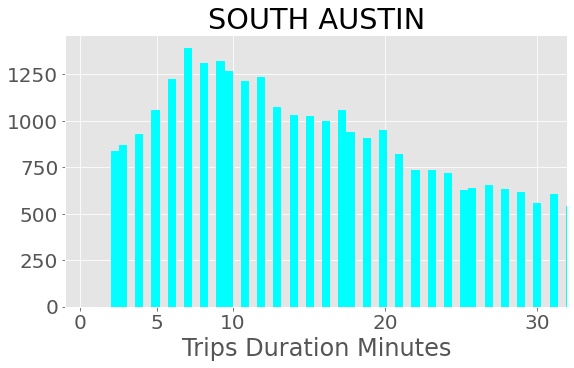

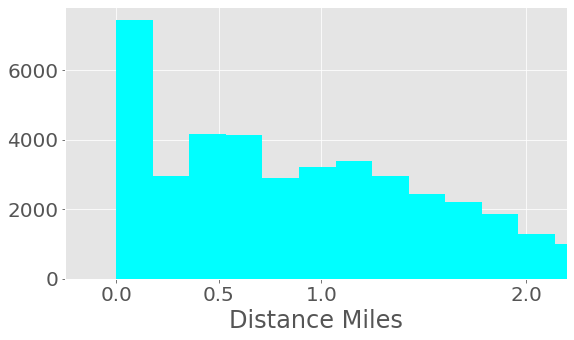

In [366]:
ntemp = 'SOUTH AUSTIN'
fig1,ax = plt.subplots(figsize = (figw,figh))
test = trips_2022.loc[trips_2022['Neighborhood Group Checkout']==ntemp]
plt.hist(test['Trip Duration Minutes'], bins = 10000, color = 'cyan');
plt.xlim(-1,32)
x = [0,5,10,20,30]
plt.xticks(x);
plt.title(ntemp)
plt.xlabel('Trips Duration Minutes');

fig2,ax = plt.subplots(figsize = (figw,figh))
plt.hist(test['Distance_Miles'], bins = 30, color = 'cyan');
plt.xlim(-0.25,2.2)
x = [0,0.5,1,2]
plt.xticks(x);
plt.xlabel('Distance Miles');

print('Number of Kiosks: ', test['Checkout Kiosk ID'].nunique(),'\n')

print('Trip Duration (Minutes)')
print('Average: ', test['Trip Duration Minutes'].mean())
print('Median: ', test['Trip Duration Minutes'].median())
print('Mode: ', test['Trip Duration Minutes'].mode())

print('\nDistance (Miles)')
print('Average: ', test['Distance_Miles'].mean())
print('Mode: ', test['Distance_Miles'].mode())


Number of Kiosks:  15 

Trip Duration (Minutes)
Average:  31.799600408883933
Median:  16.0
Mode:  0    8
dtype: int64

Distance (Miles)
Average:  1.0472646865197082
Mode:  0    0.0
dtype: float64


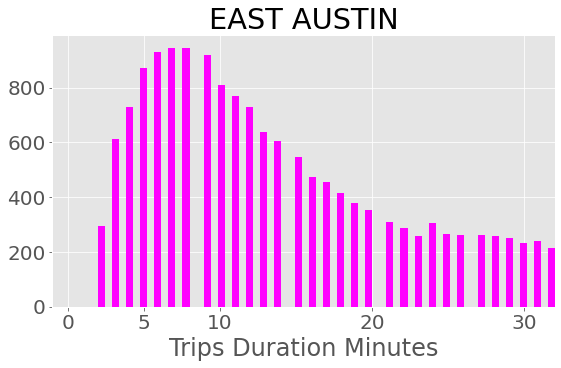

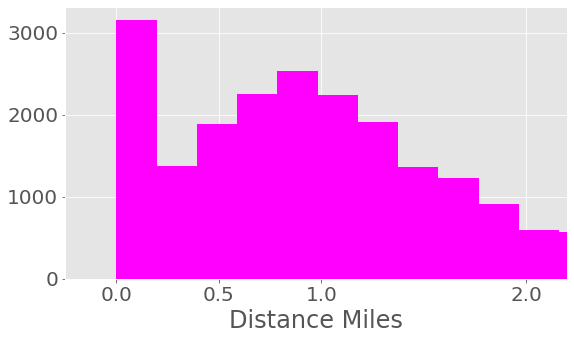

In [367]:
ntemp = 'EAST AUSTIN'
fig1,ax = plt.subplots(figsize = (figw,figh))
test = trips_2022.loc[trips_2022['Neighborhood Group Checkout']==ntemp]
plt.hist(test['Trip Duration Minutes'], bins = 10000, color = 'magenta');
plt.xlim(-1,32)
x = [0,5,10,20,30]
plt.xticks(x);
plt.title(ntemp)
plt.xlabel('Trips Duration Minutes');

fig2,ax = plt.subplots(figsize = (figw,figh))
plt.hist(test['Distance_Miles'], bins = 30, color = 'magenta');
plt.xlim(-0.25,2.2)
x = [0,0.5,1,2]
plt.xticks(x);
plt.xlabel('Distance Miles');

print('Number of Kiosks: ', test['Checkout Kiosk ID'].nunique(),'\n')

print('Trip Duration (Minutes)')
print('Average: ', test['Trip Duration Minutes'].mean())
print('Median: ', test['Trip Duration Minutes'].median())
print('Mode: ', test['Trip Duration Minutes'].mode())

print('\nDistance (Miles)')
print('Average: ', test['Distance_Miles'].mean())
print('Mode: ', test['Distance_Miles'].mode())

Number of Kiosks:  4 

Trip Duration (Minutes)
Average:  33.74576271186441
Median:  21.0
Mode:  0    11
dtype: int64

Distance (Miles)
Average:  1.3683506963609697
Mode:  0    0.0
dtype: float64


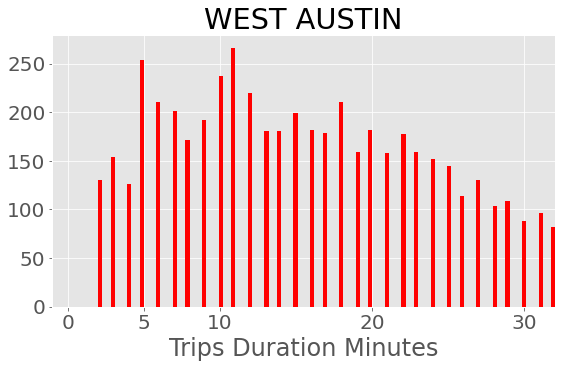

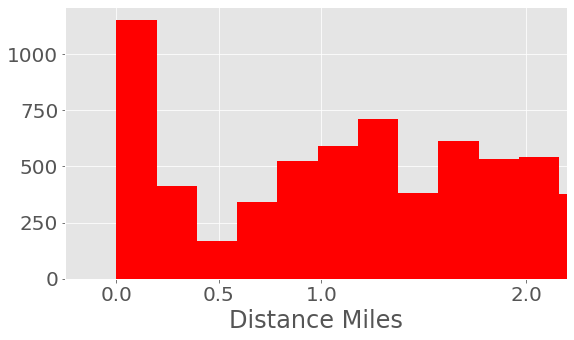

In [368]:
ntemp = 'WEST AUSTIN'
fig1,ax = plt.subplots(figsize = (figw,figh))
test = trips_2022.loc[trips_2022['Neighborhood Group Checkout']==ntemp]
plt.hist(test['Trip Duration Minutes'], bins = 10000, color = 'red');
plt.xlim(-1,32)
x = [0,5,10,20,30]
plt.xticks(x);
plt.title(ntemp)
plt.xlabel('Trips Duration Minutes');

fig2,ax = plt.subplots(figsize = (figw,figh))
plt.hist(test['Distance_Miles'], bins = 30, color = 'red');
plt.xlim(-0.25,2.2)
x = [0,0.5,1,2]
plt.xticks(x);
plt.xlabel('Distance Miles');

print('Number of Kiosks: ', test['Checkout Kiosk ID'].nunique(),'\n')

print('Trip Duration (Minutes)')
print('Average: ', test['Trip Duration Minutes'].mean())
print('Median: ', test['Trip Duration Minutes'].median())
print('Mode: ', test['Trip Duration Minutes'].mode())

print('\nDistance (Miles)')
print('Average: ', test['Distance_Miles'].mean())
print('Mode: ', test['Distance_Miles'].mode())


In [272]:
(trips_2022.groupby('Neighborhood Group Checkout').size()/trips_2022.groupby('Neighborhood Group Checkout')['Checkout Kiosk ID'].nunique()).sort_values(ascending = False)

Neighborhood Group Checkout
UT AUSTIN AREA    11873.000000
DOWNTOWN           2351.322581
SOUTH AUSTIN       2292.473684
WEST AUSTIN        1829.000000
EAST AUSTIN        1434.800000
dtype: float64

In [268]:
trips_2021.groupby('Neighborhood Group Checkout')['Trip Duration Minutes'].median().sort_values(ascending = True)

Neighborhood Group Checkout
UT AUSTIN AREA     6
DOWNTOWN          19
EAST AUSTIN       19
SOUTH AUSTIN      27
WEST AUSTIN       27
Name: Trip Duration Minutes, dtype: int64

In [88]:
(trips_2021.groupby('Neighborhood Checkout').size() / trips_2021.groupby('Neighborhood Checkout')['Checkout Kiosk ID'].nunique()).sort_values(ascending = False)

Neighborhood Checkout
UT AUSTIN              9544.250000
WEST UNIVERSITY        5747.444444
RIVERSIDE              4073.500000
ZILKER                 3230.333333
BARTON HILLS           2535.000000
OLD WEST AUSTIN        2435.500000
SOUTH RIVER CITY       2309.750000
EAST CESAR CHAVEZ      2268.800000
BOULDIN CREEK          2203.750000
DOWNTOWN               2151.466667
WEST AUSTIN NG         1248.500000
HOLLY                   915.666667
GOVALLE                 774.500000
CENTRAL EAST AUSTIN     607.200000
dtype: float64

In [89]:
trips_2021.groupby('Neighborhood Checkout')['Checkout Kiosk ID'].nunique()

Neighborhood Checkout
BARTON HILLS            3
BOULDIN CREEK           4
CENTRAL EAST AUSTIN     5
DOWNTOWN               30
EAST CESAR CHAVEZ       5
GOVALLE                 2
HOLLY                   3
OLD WEST AUSTIN         2
RIVERSIDE               2
SOUTH RIVER CITY        4
UT AUSTIN               4
WEST AUSTIN NG          2
WEST UNIVERSITY         9
ZILKER                  3
Name: Checkout Kiosk ID, dtype: int64

In [91]:
trip_count_2020 = trips.loc[trips['Year']==2020].shape[0]
trip_count_2021 = trips.loc[trips['Year']==2021].shape[0]
trip_count_2022 = trips.loc[trips['Year']==2022].shape[0]

In [92]:
((trip_count_2021 - trip_count_2020)/trip_count_2020)*100

118.97020294842216

In [93]:
((trip_count_2022 - trip_count_2020)/trip_count_2020)*100

192.95252805693505

Text(9, 321667.0, '+193%')

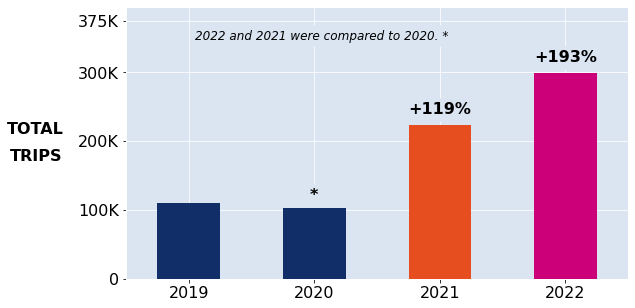

In [94]:
ymin = 0
ymax = 395e3
xmin = 5.5
xmax = 9.50

# -------------------------------
# Create Figure
# -------------------------------
fig,ax = plt.subplots(figsize = (figw,figh))
ax = plt.axes() 
ax.set_facecolor(bkg_color)

# -------------------------------
# Add Extras
# -------------------------------
#ax.add_patch(patches.Rectangle((6.5,0),375e3,ymax,color="orange",alpha=0.25))

# -------------------------------
# The Data
# -------------------------------
trips.groupby('Year').size().plot.bar(color = clrs)

# -------------------------------
# X axis: ticks, labels
# -------------------------------
ax.tick_params(axis='x', colors=ticks_color, rotation=0)
plt.xticks(fontsize=ticks_size, color = ticks_color, weight = ticks_weight)

plt.xlabel('')

plt.xlim(xmin,xmax)

# -------------------------------
# Y axis: ticks, labels
# -------------------------------
ax.tick_params(axis='y', colors=ticks_color, rotation=0)
plt.yticks(fontsize=ticks_size, color = ticks_color, weight = ticks_weight)

plt.ylabel('')
plt.text(xmin-(0.18*(xmax-xmin)),(((ymax-ymin)/2)+ymin)+(0.05*(ymax-ymin)),
         'TOTAL',ha = 'center', va='center',
         fontsize=labeltxt_size,color=labeltxt_color,weight = labeltxt_weight,rotation=0)
plt.text(xmin-(0.18*(xmax-xmin)),(((ymax-ymin)/2)+ymin)-(0.05*(ymax-ymin)),
         'TRIPS',ha = 'center', va='center',
         fontsize=labeltxt_size,color=labeltxt_color,weight = labeltxt_weight,rotation=0)

plt.ylim(ymin,ymax)

y = np.array([0,100000,200000,300000,375e3])
my_yticks = ['0','100K','200K','300K','375K']
plt.yticks(y, my_yticks)

# -------------------------------
# Additional text, calculations
# -------------------------------
prct_change_2021_cmpto2020 = ((trip_count_2021 - trip_count_2020)/trip_count_2020)*100
prct_change_2022_cmpto2020 = ((trip_count_2022 - trip_count_2020)/trip_count_2020)*100

plt.text(6.05,353e3,'2022 and 2021 were compared to 2020. *',ha = 'left',va = 'center',
         fontsize=12,color='black',rotation=0, style = 'italic',
         backgroundcolor = bkg_color)
plt.text(7,trip_count_2020+19e3, "*",
         ha = 'center', va = 'center',
         fontsize=ticks_size, weight = 'bold', color='black',rotation=0, backgroundcolor = bkg_color)
plt.text(8,trip_count_2021+22e3,
         "+"+('{:.0f}'.format(prct_change_2021_cmpto2020))+"%",
         ha = 'center', va = 'center',
         fontsize=ticks_size, weight = 'bold', color='black',rotation=0, backgroundcolor = bkg_color)
plt.text(9,trip_count_2022+22e3,
         "+"+('{:.0f}'.format(prct_change_2022_cmpto2020))+"%",
         ha = 'center', va = 'center',
         fontsize=ticks_size, weight = 'bold', color='black',rotation=0, backgroundcolor = bkg_color)

### Figure 2

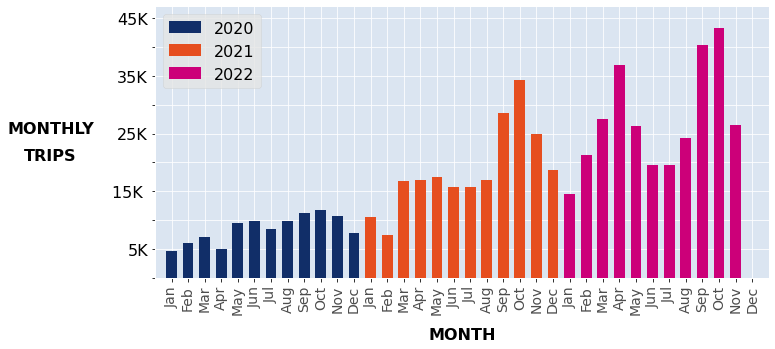

In [95]:
ymax = 47e3
ymin = 0
xmin = 0
xmax = 37

# -------------------------------
# Create Figure
# -------------------------------
fig,ax = plt.subplots(figsize = (figw+2,figh)) 
ax = plt.axes() 
ax.set_facecolor(bkg_color)

# -------------------------------
# Add Extras
# -------------------------------

# -------------------------------
# The Data
# -------------------------------
ax.bar([1,2,3,4,5,6,7,8,9,10,11,12],
       trips_2020.groupby('Month').size(),
       width=0.65, label='2020', 
                color = color_navy)
ax.bar([13,14,15,16,17,18,19,20,21,22,23,24],
       trips_2021.groupby('Month').size(),
       width=0.65, label='2021', 
                color = color_light)
ax.bar([25,26,27,28,29,30,31,32,33,34,35],
       trips_2022.groupby('Month').size(),
       width=0.65, label='2022', 
                color = color_dark)
ax.legend(loc = 'upper left',fontsize = ticks_size)

# -------------------------------
# X axis: ticks, labels
# -------------------------------
ax.tick_params(axis='x', colors=ticks_color, rotation=0)
plt.xticks(fontsize=ticks_size, color = ticks_color, weight = ticks_weight)

plt.xlabel('')
plt.text(((xmax-xmin)/2)+xmin,-10.5e3,'MONTH',ha = 'center',
         fontsize=labeltxt_size,color=labeltxt_color,weight = labeltxt_weight,rotation=0)

plt.xlim(xmin,xmax)

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]
my_xticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',
             'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',
            'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticks(x)
ax.set_xticklabels(my_xticks, fontsize=ticks_size-2, color='#4d4d4d', rotation = 90,)

# -------------------------------
# Y axis: ticks, labels
# -------------------------------
ax.tick_params(axis='y', colors=ticks_color, rotation=0)
plt.yticks(fontsize=ticks_size, color = ticks_color, weight = ticks_weight)

plt.ylabel('')
plt.text(xmin-(0.17*(xmax-xmin)),(((ymax-ymin)/2)+ymin)+(0.05*(ymax-ymin)),
         'MONTHLY',ha = 'center',va='center',
         fontsize=labeltxt_size,color=labeltxt_color,weight = labeltxt_weight,rotation=0)
plt.text(xmin-(0.17*(xmax-xmin)),(((ymax-ymin)/2)+ymin)-(0.05*(ymax-ymin)),
         'TRIPS',ha = 'center',va='center',
         fontsize=labeltxt_size,color=labeltxt_color,weight = labeltxt_weight,rotation=0)

plt.ylim(ymin,ymax)

y = [0, 5e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3,45e3]
my_yticks = [' ','5K', ' ','15K ', ' ','25K', ' ','35K',  ' ', '45K']
ax.set_yticks(y)
ax.set_yticklabels(my_yticks, fontsize=ticks_size,color=ticks_color, rotation = 0,)

plt.show()

### Figure 3

In [96]:
color_Student='#fec701'
color_Annual='#a24c90'
color_Monthly='#a7d194'
color_Day='#52a542'
color_SingleRide='#0584b4'
color_Weekend='#79e4fe'
color_Other='#bbbbbc'
color_Weekly = '#1d4baf'

In [97]:
((trips['Membership Type'].value_counts(normalize=True,ascending=True))*100)

Weekly          0.318315
Other           0.918462
Weekend         4.757903
Monthly         8.610546
Day            12.675892
Annual         19.234128
Single Ride    26.493959
Student        26.990795
Name: Membership Type, dtype: float64

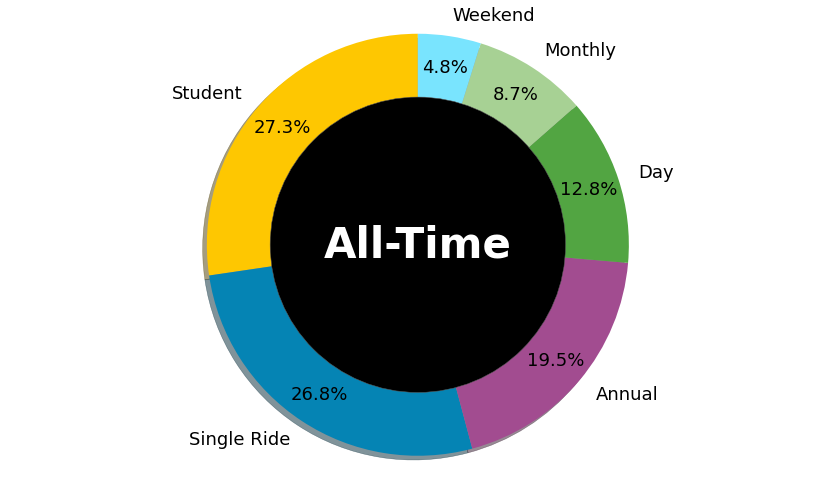

In [143]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Student', 'Single Ride', 'Annual', 'Day', 'Monthly', 'Weekend'
sizes = [26.990795, 26.493959, 19.234128, 12.675892, 8.610546, 4.757903]
explode = (0, 0, 0, 0, 0, 0)  

colors = [color_Student,
          color_SingleRide,
          color_Annual,
          color_Day,
          color_Monthly,
          color_Weekend]

fig, ax = plt.subplots(figsize = (12,7))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       textprops={'fontsize': 18, 'color':'black'},
       shadow=True, startangle=90, pctdistance=0.85)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='black',color='#5A5A5A')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.text(0,0,"All-Time", fontsize = 42, weight = 'bold',ha='center',va='center',color = 'white')
plt.tight_layout()

plt.show()

### Figure 4 - 2020 Membership Type Data

In [144]:
((trips_2020['Membership Type'].value_counts(normalize=True,ascending=True))*100)

Other           0.116334
Weekend         4.467603
Student         4.564384
Monthly        13.341219
Single Ride    20.128651
Day            21.653697
Annual         35.728112
Name: Membership Type, dtype: float64

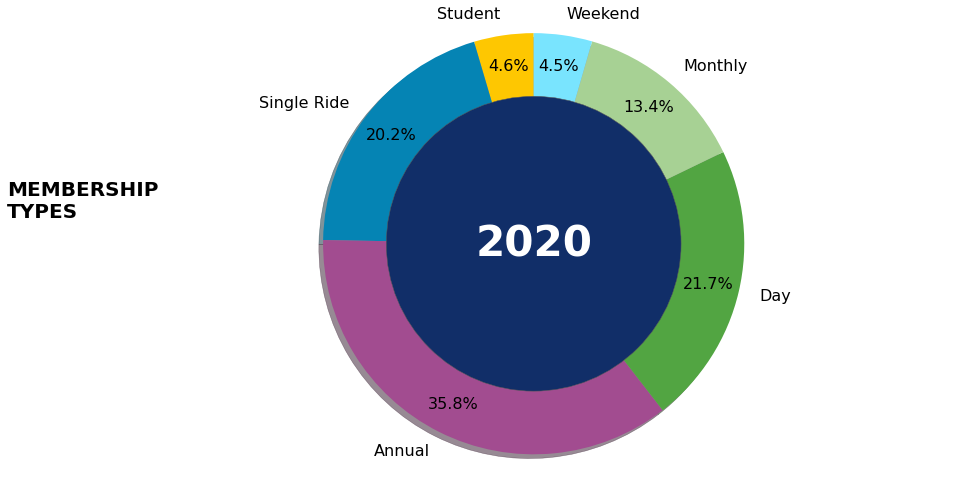

In [232]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Student', 'Single Ride', 'Annual', 'Day', 'Monthly', 'Weekend'
sizes = [4.564384, 20.128651, 35.728112, 21.653697, 13.341219, 4.467603]
explode = (0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

colors = [color_Student,
          color_SingleRide,
          color_Annual,
          color_Day,
          color_Monthly,
          color_Weekend]

fig1, ax = plt.subplots(figsize = (12,7))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       textprops={'fontsize': 16, 'color':'black'},
       shadow=True, startangle=90, pctdistance=0.85)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc=color_navy,color='#5A5A5A')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax.set_title('2021\n', fontsize = 34, weight = 'bold')
ax.text(0,0,"2020", fontsize = 42, weight = 'bold',ha='center',va='center',color = 'white')
plt.tight_layout()

ax.text(-2.5,0.20,"MEMBERSHIP\nTYPES", 
        fontsize = 20, weight = 'bold',ha='left',va='center',color = 'black')

#fig.patch.set_facecolor('#dbe5f1')
plt.show()

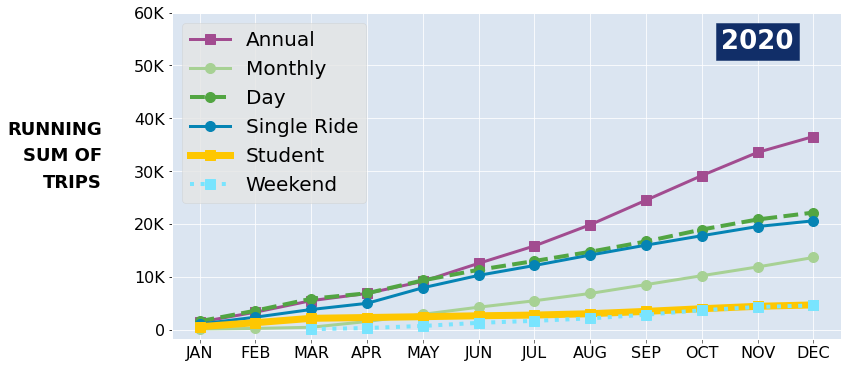

In [229]:
fig = plt.figure(figsize = (12,6))

ax = plt.axes() 
ax.set_facecolor('#dbe5f1')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2020.loc[trips_2020['Membership Type']=='Annual'].groupby('Month').size().cumsum(), 
         color=color_Annual, marker='s', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Annual')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2020.loc[trips_2020['Membership Type']=='Monthly'].groupby('Month').size().cumsum(), 
         color=color_Monthly, marker='o', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Monthly')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2020.loc[trips_2020['Membership Type']=='Day'].groupby('Month').size().cumsum(), 
         color=color_Day, marker='o', linestyle='dashed',linewidth=4, markersize=10, 
         label = 'Day')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2020.loc[trips_2020['Membership Type']=='Single Ride'].groupby('Month').size().cumsum(), 
         color=color_SingleRide, marker='o', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Single Ride')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2020.loc[trips_2020['Membership Type']=='Student'].groupby('Month').size().cumsum(), 
         color=color_Student, marker='s', linestyle='solid',linewidth=7, markersize=10, 
         label = 'Student')

plt.plot([3,4,5,6,7,8,9,10,11,12],
         trips_2020.loc[trips_2020['Membership Type']=='Weekend'].groupby('Month').size().cumsum(), 
         color=color_Weekend, marker='s', linestyle='dotted',linewidth=4, markersize=10, 
         label = 'Weekend')

ax.set_facecolor('#dbe5f1') 
#plt.xlabel('Month',fontsize=18, color = 'black')
#plt.text(6,-12000,'MONTH',fontsize=18, color = 'black', weight='bold')
plt.xticks(fontsize=16, color = 'black')
plt.xticks([2,4,6,8,10,12])
plt.xlim(0.5,12.5)
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
my_xticks = ['JAN','FEB','MAR','APR','MAY','JUN',
            'JUL','AUG','SEP','OCT','NOV','DEC',]
plt.xticks(x, my_xticks, rotation=0)

ax.tick_params(axis='y', colors='black')
plt.yticks(fontsize=16, color = 'black')
y = np.array([0,10e3, 20e3, 30e3, 40e3, 50e3, 60e3])
my_yticks = ['0','10K','20K','30K','40K','50K','60K']
plt.yticks(y, my_yticks)

plt.ylabel(' ',fontsize=20,color='black',rotation=90)
plt.text(-0.75,37e3,'RUNNING',ha = 'right',
         fontsize=18,color='black', weight = 'bold',
         rotation=0)
plt.text(-0.75,32e3,'SUM OF',ha = 'right',
         fontsize=18,color='black', weight = 'bold',
         rotation=0)
plt.text(-0.75,27e3,'TRIPS',ha = 'right',
         fontsize=18,color='black', weight = 'bold',
         rotation=0)

plt.text(11,54.5e3,"2020",backgroundcolor = color_navy, color='white',
          fontsize = 26, weight='bold',ha='center',va='center')
#plt.title("2020",color=color_navy,
#          fontsize = 26, weight='bold',ha='left',va='top')
plt.legend()

### Figure 5 - 2021 Membership Type Data

In [108]:
((trips_2021['Membership Type'].value_counts(normalize=True,ascending=True))*100)

Other           0.007143
Weekend         5.344459
Single Ride    13.437267
Day            15.360129
Monthly        16.446343
Annual         23.028363
Student        26.376295
Name: Membership Type, dtype: float64

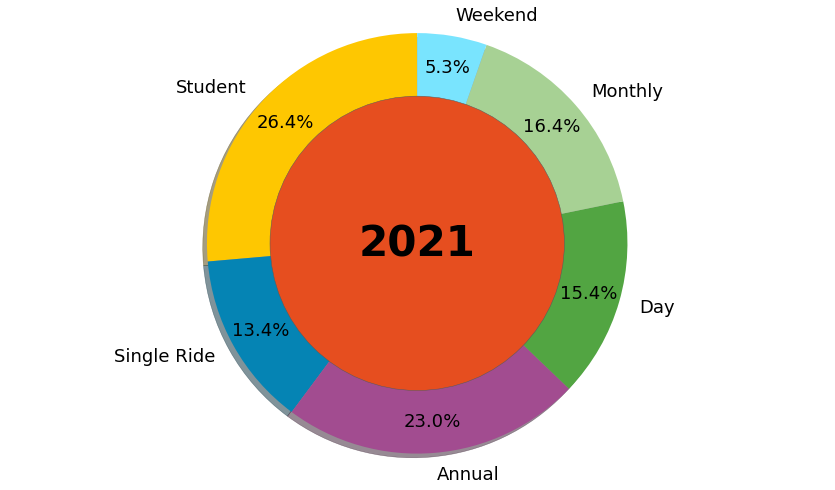

In [115]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Student', 'Single Ride', 'Annual', 'Day', 'Monthly', 'Weekend'
sizes = [26.376295, 13.437267, 23.028363, 15.360129, 16.446343, 5.344459]
explode = (0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

colors = [color_Student,
          color_SingleRide,
          color_Annual,
          color_Day,
          color_Monthly,
          color_Weekend]

fig1, ax = plt.subplots(figsize = (12,7))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       textprops={'fontsize': 18},
       shadow=True, startangle=90, pctdistance=0.85)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc=color_light,color='#5A5A5A')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax.set_title('2021\n', fontsize = 34, weight = 'bold')
ax.text(0,0,"2021", fontsize = 42, weight = 'bold',ha='center',va='center')
plt.tight_layout()
plt.show()

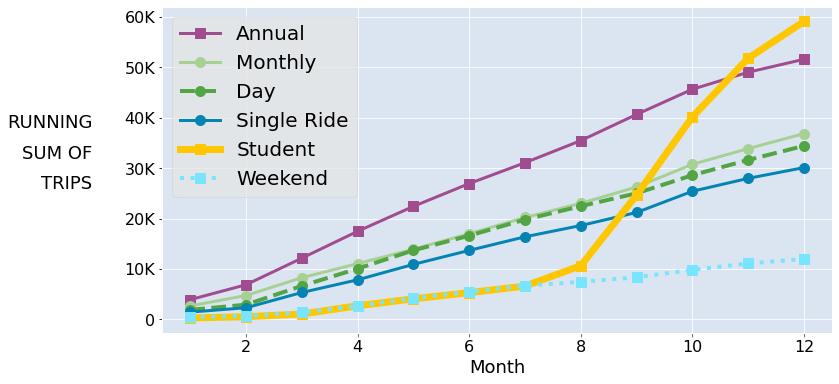

In [110]:
fig = plt.figure(figsize = (12,6))

ax = plt.axes() 
ax.set_facecolor('#dbe5f1')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2021.loc[trips_2021['Membership Type']=='Annual'].groupby('Month').size().cumsum(), 
         color=color_Annual, marker='s', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Annual')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2021.loc[trips_2021['Membership Type']=='Monthly'].groupby('Month').size().cumsum(), 
         color=color_Monthly, marker='o', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Monthly')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2021.loc[trips_2021['Membership Type']=='Day'].groupby('Month').size().cumsum(), 
         color=color_Day, marker='o', linestyle='dashed',linewidth=4, markersize=10, 
         label = 'Day')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2021.loc[trips_2021['Membership Type']=='Single Ride'].groupby('Month').size().cumsum(), 
         color=color_SingleRide, marker='o', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Single Ride')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2021.loc[trips_2021['Membership Type']=='Student'].groupby('Month').size().cumsum(), 
         color=color_Student, marker='s', linestyle='solid',linewidth=7, markersize=10, 
         label = 'Student')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2021.loc[trips_2021['Membership Type']=='Weekend'].groupby('Month').size().cumsum(), 
         color=color_Weekend, marker='s', linestyle='dotted',linewidth=4, markersize=10, 
         label = 'Weekend')

ax.set_facecolor('#dbe5f1') 
plt.xlabel('Month',fontsize=18, color = 'black')
plt.xticks(fontsize=16, color = 'black')
plt.xticks([2,4,6,8,10,12])
plt.xlim(0.5,12.5)

ax.tick_params(axis='y', colors='black')
plt.yticks(fontsize=16, color = 'black')
y = np.array([0,10e3, 20e3, 30e3, 40e3, 50e3, 60e3])
my_yticks = ['0','10K','20K','30K','40K','50K','60K']
plt.yticks(y, my_yticks)

plt.ylabel(' ',fontsize=20,color='black',rotation=90)
plt.text(-0.75,38e3,'RUNNING',ha = 'right',
         fontsize=18,color='black',
         rotation=0)
plt.text(-0.75,32e3,'SUM OF',ha = 'right',
         fontsize=18,color='black',
         rotation=0)
plt.text(-0.75,26e3,'TRIPS',ha = 'right',
         fontsize=18,color='black',
         rotation=0)

#plt.title("2021")
plt.legend()

### Figure 6 - 2022 Membership Type Data

In [111]:
((trips_2022['Membership Type'].value_counts(normalize=True,ascending=True))*100)

Other           0.010345
Weekend         5.908892
Single Ride     8.243817
Day            10.124572
Annual         10.943481
Monthly        14.915890
Student        49.853004
Name: Membership Type, dtype: float64

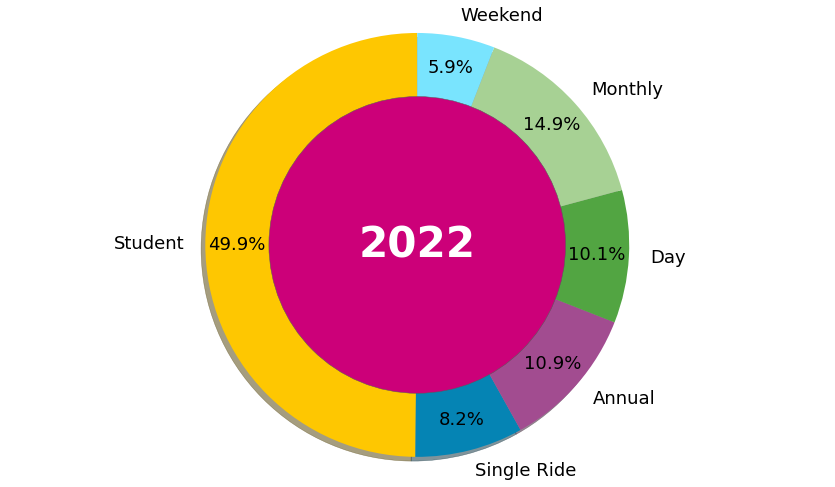

In [114]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Student', 'Single Ride', 'Annual', 'Day', 'Monthly', 'Weekend'
sizes = [49.853004, 8.243817, 10.943481, 10.124572, 14.915890, 5.908892]
explode = (0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

colors = [color_Student,
          color_SingleRide,
          color_Annual,
          color_Day,
          color_Monthly,
          color_Weekend]

fig1, ax = plt.subplots(figsize = (12,7))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       textprops={'fontsize': 18},
        shadow=True, startangle=90, pctdistance=0.85)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc=color_dark, color ='#5A5A5A' )
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax.set_title('2021\n', fontsize = 34, weight = 'bold')
ax.text(0,0,"2022", fontsize = 42, weight = 'bold',ha='center',va='center',color='white')
plt.tight_layout()
plt.show()

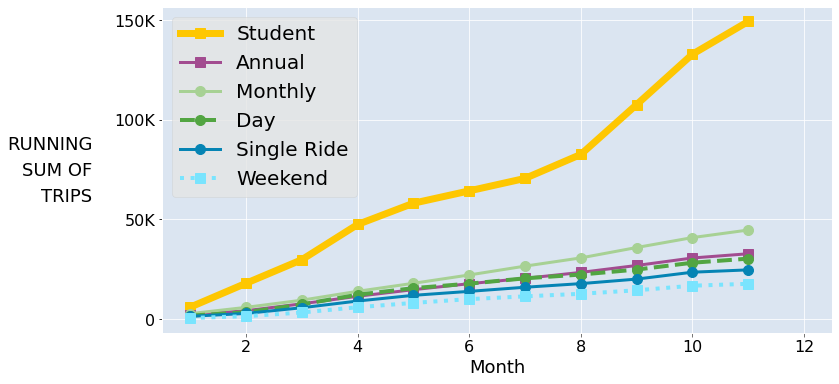

In [113]:
fig = plt.figure(figsize = (12,6))

ax = plt.axes() 
ax.set_facecolor('#dbe5f1')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.loc[trips_2022['Membership Type']=='Student'].groupby('Month').size().cumsum(), 
         color=color_Student, marker='s', linestyle='solid',linewidth=7, markersize=10, 
         label = 'Student')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.loc[trips_2022['Membership Type']=='Annual'].groupby('Month').size().cumsum(), 
         color=color_Annual, marker='s', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Annual')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.loc[trips_2022['Membership Type']=='Monthly'].groupby('Month').size().cumsum(), 
         color=color_Monthly, marker='o', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Monthly')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.loc[trips_2022['Membership Type']=='Day'].groupby('Month').size().cumsum(), 
         color=color_Day, marker='o', linestyle='dashed',linewidth=4, markersize=10, 
         label = 'Day')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.loc[trips_2022['Membership Type']=='Single Ride'].groupby('Month').size().cumsum(), 
         color=color_SingleRide, marker='o', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Single Ride')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.loc[trips_2022['Membership Type']=='Weekend'].groupby('Month').size().cumsum(), 
         color=color_Weekend, marker='s', linestyle='dotted',linewidth=4, markersize=10, 
         label = 'Weekend')

ax.set_facecolor('#dbe5f1') 
plt.xlabel('Month',fontsize=18, color = 'black')
plt.xticks(fontsize=16, color = 'black')
plt.xticks([2,4,6,8,10,12])
plt.xlim(0.5,12.5)

ax.tick_params(axis='y', colors='black')
plt.yticks(fontsize=16, color = 'black')
y = np.array([0, 50e3, 100e3, 150e3])
my_yticks = ['0','50K','100K','150K']
plt.yticks(y, my_yticks)

plt.ylabel(' ',fontsize=20,color='black',rotation=90)
plt.text(-0.75,85e3,'RUNNING',ha = 'right',
         fontsize=18,color='black',
         rotation=0)
plt.text(-0.75,72e3,'SUM OF',ha = 'right',
         fontsize=18,color='black',
         rotation=0)
plt.text(-0.75,59e3,'TRIPS',ha = 'right',
         fontsize=18,color='black',
         rotation=0)

#plt.title("2022")
plt.legend()

# Maps

In [25]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [26]:
# Neighborhoods Shape File
base_map_neighborhoods = gpd.read_file(
    '../data/data_austintexas_gov/Neighborhoods/geo_export_dc98148d-fe86-40df-83c0-be01050282f9.shp')

In [27]:
loc_full = kiosk['Location']
loc_full
loc_split = loc_full.str.split(',', n=- 1, expand=True)
lat_0 = loc_split[0]
lon_0 = loc_split[1]

# print(lat_0[1][1:-1])

lat = lat_0.str.replace('(', '')
lon = lon_0.str.replace(')', '')

kiosk["Latitude"] = lat.astype('float')
kiosk["Longitude"] = lon.astype('float')

<ipython-input-27-717bee1454b7>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  lat = lat_0.str.replace('(', '')
<ipython-input-27-717bee1454b7>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  lon = lon_0.str.replace(')', '')


In [28]:
geometry = [Point(xy) for xy in zip( kiosk["Longitude"], kiosk["Latitude"])]
geometry[:3]

In [29]:
crs = "EPSG:4326"

# create geo-DataFrame
kiosk_geo = gpd.GeoDataFrame(kiosk,crs = crs,
                         geometry = geometry)

In [30]:
kiosk_geo.head()

,Unnamed: 0,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,Footprint Length,Footprint Width,Notes,Council District,Image,Modified Date,Latitude,Longitude,geometry,Neighborhood,Lat,Lon
0,0,2823,East 5th/Broadway @ Capital Metro HQ,active,"(30.2563, -97.71007)",2910 E 5th St,NaN,16684.0,undetermined_parking,13.0,solar,40.0,5.0,NaN,3,NaN,01/04/2021 12:00:00 AM,30.256300,-97.710070,POINT (-97.71007 30.25630),GOVALLE,30.256300,-97.710070
1,1,3291,11th/San Jacinto,active,"(30.27193, -97.73854)",310 E. 11th St.,NaN,32503.0,sidewalk,11.0,solar,35.0,5.0,NaN,1,NaN,01/04/2021 12:00:00 AM,30.271930,-97.738540,POINT (-97.73854 30.27193),DOWNTOWN,30.271930,-97.738540
2,2,3292,East 4th/Chicon,active,"(30.25987, -97.72373)",1819 East 4th St.,NaN,32516.0,undetermined_parking,9.0,solar,30.0,5.0,NaN,3,NaN,01/04/2021 12:00:00 AM,30.259870,-97.723730,POINT (-97.72373 30.25987),EAST CESAR CHAVEZ,30.259870,-97.723730
3,3,3293,East 2nd/Pedernales,active,"(30.25542, -97.71665)",2414 E 2nd St,NaN,16729.0,nonmetered_parking,10.0,solar,20.0,15.0,Kiosk replaced by Barton Sp/Riverside. Old ci...,3,NaN,01/04/2021 12:00:00 AM,30.255420,-97.716650,POINT (-97.71665 30.25542),HOLLY,30.255420,-97.716650
4,4,3294,6th/Lavaca,active,"(30.268887, -97.745242)",601 Lavaca St.,NaN,32515.0,sidewalk,12.0,solar,25.0,8.0,"double sided, remeasure",9,NaN,03/04/2022 10:21:00 AM,30.268887,-97.745242,POINT (-97.74524 30.26889),DOWNTOWN,30.268887,-97.745242


In [31]:
print('Lat: ', kiosk_geo['Latitude'].min(),kiosk_geo['Latitude'].max())
print('Lon: ', kiosk_geo['Longitude'].min(),kiosk_geo['Longitude'].max())

Lat:  30.24258 30.29439
Lon:  -97.78375 -97.69807


In [32]:
# x and y limits, x and y ticks
xlen = kiosk_geo['Longitude'].max()-kiosk_geo['Longitude'].min()
xdelta = 0.05*xlen
xlo = kiosk_geo['Longitude'].min()-xdelta
xhi = kiosk_geo['Longitude'].max()+xdelta
xmid = (xlen/2)+xlo

ylen = kiosk_geo['Latitude'].max()-kiosk_geo['Latitude'].min()
ydelta = 0.05*ylen
ylo = kiosk_geo['Latitude'].min()-ydelta
yhi = kiosk_geo['Latitude'].max()+ydelta
ymid = (ylen/2)+ylo

print("ylo: ", ylo)
print("yhi: ", yhi)
print('\n')
print("xlo: ", xlo)
print("xhi: ", xhi)

ylo:  30.2399895
yhi:  30.2969805


xlo:  -97.788034
xhi:  -97.693786


In [33]:
trips_temp = trips_recent
trips_Student = trips_temp.loc[trips_temp['Membership Type']=='Student']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Student.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Student Rides'}, 
                             inplace = True)
trips_Annual = trips_temp.loc[trips_temp['Membership Type']=='Annual']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Annual.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Annual Rides'}, 
                             inplace = True)
trips_Monthly = trips_temp.loc[trips_temp['Membership Type']=='Monthly']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Monthly.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Monthly Rides'}, 
                             inplace = True)
trips_Day = trips_temp.loc[trips_temp['Membership Type']=='Day']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Day.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Day Rides'}, 
                             inplace = True)
trips_SingleRide = trips_temp.loc[trips_temp['Membership Type']=='Single Ride']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_SingleRide.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Single Rides'}, 
                             inplace = True)
trips_Weekend = trips_temp.loc[trips_temp['Membership Type']=='3-Day Weekend']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Weekend.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Weekend Rides'}, 
                             inplace = True)
trips_Other = trips_temp.loc[trips_temp['Membership Type']=='Other']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Other.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Other Rides'}, 
                             inplace = True)
trips_all = trips_temp['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_all.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'All Rides'}, 
                             inplace = True)

test_kiosks = kiosk_geo['Kiosk ID'].to_frame()
result0 = test_kiosks.merge(trips_Student, how = "left", on=["Kiosk ID","Kiosk ID"])
result1 = result0.merge(trips_Annual, how = "left", on=["Kiosk ID","Kiosk ID"])
result2 = result1.merge(trips_Monthly, how = "left", on=["Kiosk ID","Kiosk ID"])
result3 = result2.merge(trips_Day, how = "left", on=["Kiosk ID","Kiosk ID"])
result4 = result3.merge(trips_SingleRide, how = "left", on=["Kiosk ID","Kiosk ID"])
result5 = result4.merge(trips_Weekend, how = "left", on=["Kiosk ID","Kiosk ID"])
result6 = result5.merge(trips_Other, how = "left", on=["Kiosk ID","Kiosk ID"])
result = result6.merge(trips_all, how = "left", on=["Kiosk ID","Kiosk ID"])

result.head(10)

,Kiosk ID,Student Rides,Annual Rides,Monthly Rides,Day Rides,Single Rides,Weekend Rides,Other Rides,All Rides
0,2823,43.0,899.0,697.0,346.0,297.0,NaN,1.0,2526.0
1,3291,73.0,1754.0,476.0,474.0,280.0,NaN,NaN,3323.0
2,3292,47.0,1296.0,840.0,625.0,543.0,NaN,3.0,3680.0
3,3293,38.0,561.0,549.0,554.0,329.0,NaN,1.0,2478.0
4,3294,270.0,484.0,388.0,383.0,300.0,NaN,NaN,2000.0
5,3377,518.0,1430.0,1043.0,3026.0,2629.0,NaN,1.0,9183.0
6,3513,180.0,1803.0,1101.0,1825.0,1328.0,NaN,NaN,7176.0
7,3660,387.0,2824.0,1707.0,817.0,925.0,NaN,3.0,7396.0
8,3684,237.0,596.0,536.0,1842.0,1337.0,NaN,NaN,5352.0
9,3685,446.0,1349.0,1231.0,575.0,472.0,NaN,2.0,4445.0


In [34]:
print("5th: ", result['All Rides'].quantile(0.05))
print("25th: ", result['All Rides'].quantile(0.25))
print("50th: ", result['All Rides'].quantile(0.50))
print("75th: ", result['All Rides'].quantile(0.75))
print("95th: ", result['All Rides'].quantile(0.95))

5th:  1081.2
25th:  2795.0
50th:  5342.0
75th:  8848.0
95th:  21432.999999999996


### Figure 7 Map - 2020

In [35]:
yr_txt = '2020'

In [36]:
trips_temp = trips_2020
trips_Student = trips_temp.loc[trips_temp['Membership Type']=='Student']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Student.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Student Rides'}, 
                             inplace = True)
trips_Annual = trips_temp.loc[trips_temp['Membership Type']=='Annual']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Annual.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Annual Rides'}, 
                             inplace = True)
trips_Monthly = trips_temp.loc[trips_temp['Membership Type']=='Monthly']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Monthly.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Monthly Rides'}, 
                             inplace = True)
trips_Day = trips_temp.loc[trips_temp['Membership Type']=='Day']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Day.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Day Rides'}, 
                             inplace = True)
trips_SingleRide = trips_temp.loc[trips_temp['Membership Type']=='Single Ride']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_SingleRide.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Single Rides'}, 
                             inplace = True)
trips_Weekend = trips_temp.loc[trips_temp['Membership Type']=='3-Day Weekend']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Weekend.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Weekend Rides'}, 
                             inplace = True)
trips_Other = trips_temp.loc[trips_temp['Membership Type']=='Other']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Other.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Other Rides'}, 
                             inplace = True)
trips_all = trips_temp['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_all.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'All Rides'}, 
                             inplace = True)

test_kiosks = kiosk_geo['Kiosk ID'].to_frame()
result0 = test_kiosks.merge(trips_Student, how = "left", on=["Kiosk ID","Kiosk ID"])
result1 = result0.merge(trips_Annual, how = "left", on=["Kiosk ID","Kiosk ID"])
result2 = result1.merge(trips_Monthly, how = "left", on=["Kiosk ID","Kiosk ID"])
result3 = result2.merge(trips_Day, how = "left", on=["Kiosk ID","Kiosk ID"])
result4 = result3.merge(trips_SingleRide, how = "left", on=["Kiosk ID","Kiosk ID"])
result5 = result4.merge(trips_Weekend, how = "left", on=["Kiosk ID","Kiosk ID"])
result6 = result5.merge(trips_Other, how = "left", on=["Kiosk ID","Kiosk ID"])
result = result6.merge(trips_all, how = "left", on=["Kiosk ID","Kiosk ID"])

result.head(10)

,Kiosk ID,Student Rides,Annual Rides,Monthly Rides,Day Rides,Single Rides,Weekend Rides,Other Rides,All Rides
0,2823,3.0,101.0,127.0,111.0,61.0,NaN,1.0,496.0
1,3291,2.0,676.0,157.0,104.0,76.0,NaN,NaN,1030.0
2,3292,NaN,136.0,97.0,157.0,177.0,NaN,2.0,614.0
3,3293,NaN,132.0,143.0,135.0,71.0,NaN,NaN,513.0
4,3294,7.0,120.0,49.0,82.0,84.0,NaN,NaN,349.0
5,3377,20.0,479.0,189.0,1008.0,918.0,NaN,1.0,2732.0
6,3513,8.0,517.0,240.0,473.0,395.0,NaN,NaN,1729.0
7,3660,2.0,662.0,271.0,151.0,245.0,NaN,3.0,1384.0
8,3684,7.0,118.0,35.0,383.0,275.0,NaN,NaN,852.0
9,3685,14.0,380.0,126.0,144.0,113.0,NaN,2.0,829.0


In [37]:
# Fake Kiosk Dataframe - for Legend
legdf = pd.DataFrame()

row2 = {'Kiosk ID': 2, 'Kiosk Name': 'Two', 'Kiosk Status': 'Unknown','Location': '(30.2808, -97.700)','Address': 'None','Alternate Name': '','City Asset Number': '','Property Type': '','Number of Docks': '','Power Type': '','Footprint Length': '','Footprint Width': '','Notes': '','Council District': 0,'Image': '','Modified Date': '', 'All Rides': 3000}
legdf = legdf.append(row2, ignore_index = True)
row3 = {'Kiosk ID': 3, 'Kiosk Name': 'Three', 'Kiosk Status': 'Unknown','Location': '(30.2832, -97.700)','Address': 'None','Alternate Name': '','City Asset Number': '','Property Type': '','Number of Docks': '','Power Type': '','Footprint Length': '','Footprint Width': '','Notes': '','Council District': 0,'Image': '','Modified Date': '', 'All Rides': 5000}
legdf = legdf.append(row3, ignore_index = True)
row4 = {'Kiosk ID': 4, 'Kiosk Name': 'Four', 'Kiosk Status': 'Unknown','Location': '(30.2865, -97.700)','Address': 'None','Alternate Name': '','City Asset Number': '','Property Type': '','Number of Docks': '','Power Type': '','Footprint Length': '','Footprint Width': '','Notes': '','Council District': 0,'Image': '','Modified Date': '', 'All Rides': 10000}
legdf = legdf.append(row4, ignore_index = True)
row5 = {'Kiosk ID': 5, 'Kiosk Name': 'Five', 'Kiosk Status': 'Unknown','Location': '(30.2912, -97.700)','Address': 'None','Alternate Name': '','City Asset Number': '','Property Type': '','Number of Docks': '','Power Type': '','Footprint Length': '','Footprint Width': '','Notes': '','Council District': 0,'Image': '','Modified Date': '', 'All Rides': 20000}
legdf = legdf.append(row5, ignore_index = True)

loc_full = legdf['Location']
loc_full
loc_split = loc_full.str.split(',', n=- 1, expand=True)
lat_0 = loc_split[0]
lon_0 = loc_split[1]

# print(lat_0[1][1:-1])

lat = lat_0.str.replace('(', '')
lon = lon_0.str.replace(')', '')

legdf["Latitude"] = lat.astype('float')
legdf["Longitude"] = lon.astype('float')

geometry = [Point(xy) for xy in zip( legdf["Longitude"], legdf["Latitude"])]
geometry[:3]

crs = "EPSG:4326"

# create geo-DataFrame
legdf_geo = gpd.GeoDataFrame(legdf,crs = crs,
                         geometry = geometry)

<ipython-input-37-05cc43c9462c>:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  lat = lat_0.str.replace('(', '')
<ipython-input-37-05cc43c9462c>:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  lon = lon_0.str.replace(')', '')


Text(-97.7001, 30.2912, '20K')

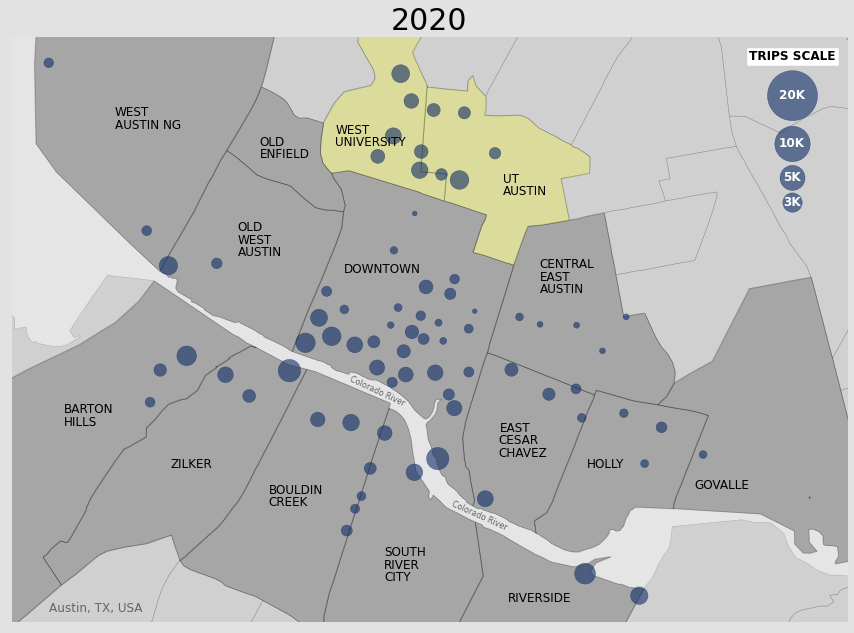

In [38]:
msize_divby = 8
markersize = result['All Rides']/msize_divby

fig,ax = plt.subplots(figsize = (15,15))
base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="gray",edgecolor='black')

color_dark_gray = '#5A5A5A'

# Neighborhoods
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.25, color='yellow',edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.25, color='yellow',edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')

kiosk_geo.plot(ax = ax, color=color_navy,markersize=markersize, alpha=0.60)

ax.set_xlim(xlo,xhi)
ax.set_ylim(ylo,yhi)

xspace = (xhi-xlo)/5
ax.set_title(yr_txt,fontsize=30)

plt.text(-97.7326,30.2827,"UT",color='black', 
        fontsize = 12)
plt.text(-97.7326,30.2815,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.7515,30.2875,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7515,30.2863,"UNIVERSITY",color='black', 
        fontsize = 12)
plt.text(-97.7505,30.274,"DOWNTOWN",color='black', 
        fontsize = 12)
plt.text(-97.732,30.242,"RIVERSIDE",color='black', 
        fontsize = 12)
plt.text(-97.733,30.2585,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2573,"CESAR",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2561,"CHAVEZ",color='black', 
        fontsize = 12)
plt.text(-97.7231,30.2550,"HOLLY",color='black', 
        fontsize = 12)
plt.text(-97.711,30.253,"GOVALLE",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2744,"CENTRAL",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2732,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2720,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.760,30.2863,"OLD",color='black', 
        fontsize = 12)
plt.text(-97.760,30.2851,"ENFIELD",color='black', 
        fontsize = 12)
plt.text(-97.770,30.255,"ZILKER",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2780,"OLD",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2768,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2756,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.782,30.2603,"BARTON",color='black', 
        fontsize = 12)
plt.text(-97.782,30.2591,"HILLS",color='black', 
        fontsize = 12)
plt.text(-97.759,30.2525,"BOULDIN",color='black', 
        fontsize = 12)
plt.text(-97.759,30.2513,"CREEK",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2464,"SOUTH",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2452,"RIVER",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2440,"CITY",color='black', 
        fontsize = 12)
plt.text(-97.7763,30.2892,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7763,30.2880,"AUSTIN NG",color='black', 
        fontsize = 12)
plt.text(-97.7500,30.26105,"Colorado River",color='#606467', 
        fontsize = 8, rotation = -25)
plt.text(-97.7385,30.24895,"Colorado River",color='#606467', 
        fontsize = 8, rotation = -24)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

fig.patch.set_facecolor('#e2e2e2')
ax.spines['left'].set_color('#e2e2e2') 
ax.spines['right'].set_color('#e2e2e2') 
ax.spines['bottom'].set_color('#e2e2e2') 
ax.spines['top'].set_color('#e2e2e2') 

plt.text(xlo+(xspace*0.79),ylo+0.0010,"Austin, TX, USA",color='#656565', 
        fontsize = 12, horizontalalignment='right')

# Create legend
legdf_geo.plot(ax = ax, color=color_navy,markersize=legdf_geo['All Rides']/msize_divby, alpha=0.60)
plt.text(-97.700,30.2900+0.005,"TRIPS SCALE",color='black', backgroundcolor = 'white', va='center', ha='center',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7001,30.2808,"3K",color='white', va='center', ha='center', weight = 'bold',
        fontsize = 12, rotation = 0)
plt.text(-97.7001,30.2832,"5K",color='white', va='center', ha='center', weight = 'bold',
        fontsize = 12, rotation = 0)
plt.text(-97.7001,30.2865,"10K",color='white', va='center', ha='center', weight = 'bold',
        fontsize = 12, rotation = 0)
plt.text(-97.7001,30.2912,"20K",color='white', va='center', ha='center', weight = 'bold',
        fontsize = 12, rotation = 0)

In [39]:
kiosk_geo['Neighborhood'].unique()

array(['GOVALLE', 'DOWNTOWN', 'EAST CESAR CHAVEZ', 'HOLLY',
       'OLD WEST AUSTIN', 'SOUTH RIVER CITY', 'ZILKER', 'UT AUSTIN',
       'WEST UNIVERSITY', 'BARTON HILLS', 'RIVERSIDE', 'BOULDIN CREEK',
       'CENTRAL EAST AUSTIN', 'WEST AUSTIN NG', 'OLD ENFIELD'],
      dtype=object)

In [40]:
kiosk_geo.loc[kiosk_geo['Neighborhood'].isin(['UT AUSTIN','WEST UNIVERSITY'])]

,Unnamed: 0,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,Footprint Length,Footprint Width,Notes,Council District,Image,Modified Date,Latitude,Longitude,geometry,Neighborhood,Lat,Lon
11,11,2498,Dean Keeton/Speedway,active,"(30.28953, -97.73695)",180 E. Dean Keeton St.,NaN,32670.0,undetermined_parking,19.0,solar,55.0,5.0,NaN,9,NaN,01/04/2021 12:00:00 AM,30.289530,-97.736950,POINT (-97.73695 30.28953),UT AUSTIN,30.289530,-97.736950
12,12,3795,Dean Keeton/Whitis,active,"(30.2898, -97.74041)",300 W. Dean Keeton St.,NaN,32671.0,undetermined_parking,19.0,solar,55.0,5.0,NaN,9,NaN,01/04/2021 12:00:00 AM,30.289800,-97.740410,POINT (-97.74041 30.28980),UT AUSTIN,30.289800,-97.740410
13,13,3797,21st/University,active,"(30.28354, -97.73953)",2007 University Ave.,NaN,32674.0,undetermined_parking,19.0,solar,55.0,5.0,ROW might belong to UT,9,NaN,01/04/2021 12:00:00 AM,30.283540,-97.739530,POINT (-97.73953 30.28354),WEST UNIVERSITY,30.283540,-97.739530
14,14,3798,21st/Speedway @ PCL,active,"(30.283, -97.7375)",E. 21st St.,NaN,32675.0,sidewalk,22.0,solar,30.0,7.5,On UT property-2 sided,9,NaN,01/04/2021 12:00:00 AM,30.283000,-97.737500,POINT (-97.73750 30.28300),UT AUSTIN,30.283000,-97.737500
54,54,2547,21st/Guadalupe,active,"(30.28395, -97.74198)",2100 Guadalupe St.,NaN,16749.0,paid_parking,13.0,solar,40.0,5.0,in buffer area parking,9,NaN,01/04/2021 12:00:00 AM,30.283950,-97.741980,POINT (-97.74198 30.28395),WEST UNIVERSITY,30.283950,-97.741980
55,55,2548,Guadalupe/West Mall @ University Co-op,active,"(30.28576, -97.74181)",2242 Guadalupe St.,NaN,16748.0,paid_parking,15.0,solar,45.0,5.0,"in buffer area parking, check dock #",9,NaN,01/04/2021 12:00:00 AM,30.285760,-97.741810,POINT (-97.74181 30.28576),WEST UNIVERSITY,30.285760,-97.741810
65,65,7188,22nd/Pearl,active,"(30.2853, -97.7467)",900 W. 22nd,NaN,32669.0,undetermined_parking,13.0,solar,40.0,5.0,NaN,9,NaN,01/04/2021 12:00:00 AM,30.285300,-97.746700,POINT (-97.74670 30.28530),WEST UNIVERSITY,30.285300,-97.746700
66,66,3793,28th/Rio Grande,active,"(30.29333, -97.74412)",2717 Rio Grande St.,NaN,32668.0,paid_parking,13.0,solar,40.0,5.0,NaN,9,NaN,01/04/2021 12:00:00 AM,30.293330,-97.744120,POINT (-97.74412 30.29333),WEST UNIVERSITY,30.293330,-97.744120
68,68,3799,23rd/San Jacinto @ DKR Stadium,active,"(30.2856, -97.7335)",E. 23rd St.,NaN,32676.0,sidewalk,22.0,solar,30.0,7.5,On UT property-2 sided,1,NaN,01/04/2021 12:00:00 AM,30.285600,-97.733500,POINT (-97.73350 30.28560),UT AUSTIN,30.285600,-97.733500
69,69,3838,26th/Nueces,active,"(30.29068, -97.74292)",600 W. 26th St.,NaN,16744.0,undetermined_parking,13.0,solar,40.0,5.0,NaN,9,NaN,01/04/2021 12:00:00 AM,30.290680,-97.742920,POINT (-97.74292 30.29068),WEST UNIVERSITY,30.290680,-97.742920


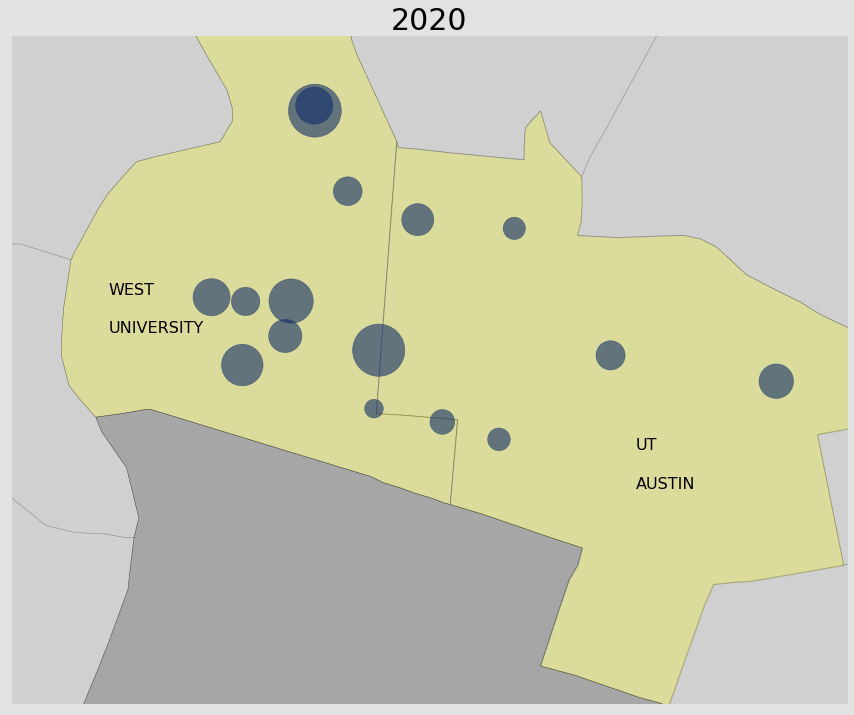

In [41]:
markersize = result['All Rides']

fig,ax = plt.subplots(figsize = (15,15))
base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="gray",edgecolor='black')

color_dark_gray = '#5A5A5A'

# Neighborhoods
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.25, color='yellow',edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.25, color='yellow',edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')

kiosk_geo.loc[kiosk_geo['Neighborhood'].isin(['UT AUSTIN','WEST UNIVERSITY'])].plot(ax = ax, color=color_navy,markersize=markersize, alpha=0.60)

ax.set_xlim(-97.755,-97.725)
ax.set_ylim(30.2748,30.2955)

xspace = (xhi-xlo)/5
ax.set_title(yr_txt,fontsize=30)

plt.text(-97.7326,30.2827,"UT",color='black', 
        fontsize = 16)
plt.text(-97.7326,30.2815,"AUSTIN",color='black', 
        fontsize = 16)
plt.text(-97.7515,30.2875,"WEST",color='black', 
        fontsize = 16)
plt.text(-97.7515,30.2863,"UNIVERSITY",color='black', 
        fontsize = 16)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

fig.patch.set_facecolor('#e2e2e2')
ax.spines['left'].set_color('#e2e2e2') 
ax.spines['right'].set_color('#e2e2e2') 
ax.spines['bottom'].set_color('#e2e2e2') 
ax.spines['top'].set_color('#e2e2e2') 

### Figure 8 Map - 2021

In [42]:
yr_txt = '2021'

In [43]:
trips_temp = trips_2021
trips_Student = trips_temp.loc[trips_temp['Membership Type']=='Student']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Student.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Student Rides'}, 
                             inplace = True)
trips_Annual = trips_temp.loc[trips_temp['Membership Type']=='Annual']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Annual.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Annual Rides'}, 
                             inplace = True)
trips_Monthly = trips_temp.loc[trips_temp['Membership Type']=='Monthly']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Monthly.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Monthly Rides'}, 
                             inplace = True)
trips_Day = trips_temp.loc[trips_temp['Membership Type']=='Day']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Day.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Day Rides'}, 
                             inplace = True)
trips_SingleRide = trips_temp.loc[trips_temp['Membership Type']=='Single Ride']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_SingleRide.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Single Rides'}, 
                             inplace = True)
trips_Weekend = trips_temp.loc[trips_temp['Membership Type']=='3-Day Weekend']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Weekend.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Weekend Rides'}, 
                             inplace = True)
trips_Other = trips_temp.loc[trips_temp['Membership Type']=='Other']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Other.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Other Rides'}, 
                             inplace = True)
trips_all = trips_temp['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_all.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'All Rides'}, 
                             inplace = True)

test_kiosks = kiosk_geo['Kiosk ID'].to_frame()
result0 = test_kiosks.merge(trips_Student, how = "left", on=["Kiosk ID","Kiosk ID"])
result1 = result0.merge(trips_Annual, how = "left", on=["Kiosk ID","Kiosk ID"])
result2 = result1.merge(trips_Monthly, how = "left", on=["Kiosk ID","Kiosk ID"])
result3 = result2.merge(trips_Day, how = "left", on=["Kiosk ID","Kiosk ID"])
result4 = result3.merge(trips_SingleRide, how = "left", on=["Kiosk ID","Kiosk ID"])
result5 = result4.merge(trips_Weekend, how = "left", on=["Kiosk ID","Kiosk ID"])
result6 = result5.merge(trips_Other, how = "left", on=["Kiosk ID","Kiosk ID"])
result = result6.merge(trips_all, how = "left", on=["Kiosk ID","Kiosk ID"])

result.head(10)

,Kiosk ID,Student Rides,Annual Rides,Monthly Rides,Day Rides,Single Rides,Weekend Rides,Other Rides,All Rides
0,2823,21.0,309.0,289.0,118.0,126.0,NaN,NaN,912.0
1,3291,23.0,835.0,161.0,216.0,115.0,NaN,NaN,1460.0
2,3292,7.0,622.0,415.0,275.0,212.0,NaN,1.0,1665.0
3,3293,10.0,317.0,241.0,204.0,125.0,NaN,1.0,1032.0
4,3294,64.0,135.0,127.0,174.0,121.0,NaN,NaN,684.0
5,3377,129.0,534.0,549.0,1203.0,1102.0,NaN,NaN,3694.0
6,3513,62.0,775.0,336.0,608.0,459.0,NaN,NaN,2570.0
7,3660,72.0,804.0,720.0,337.0,365.0,NaN,NaN,2611.0
8,3684,51.0,207.0,175.0,693.0,492.0,NaN,NaN,1878.0
9,3685,117.0,568.0,493.0,240.0,196.0,NaN,NaN,1792.0


Text(-97.7001, 30.2912, '20K')

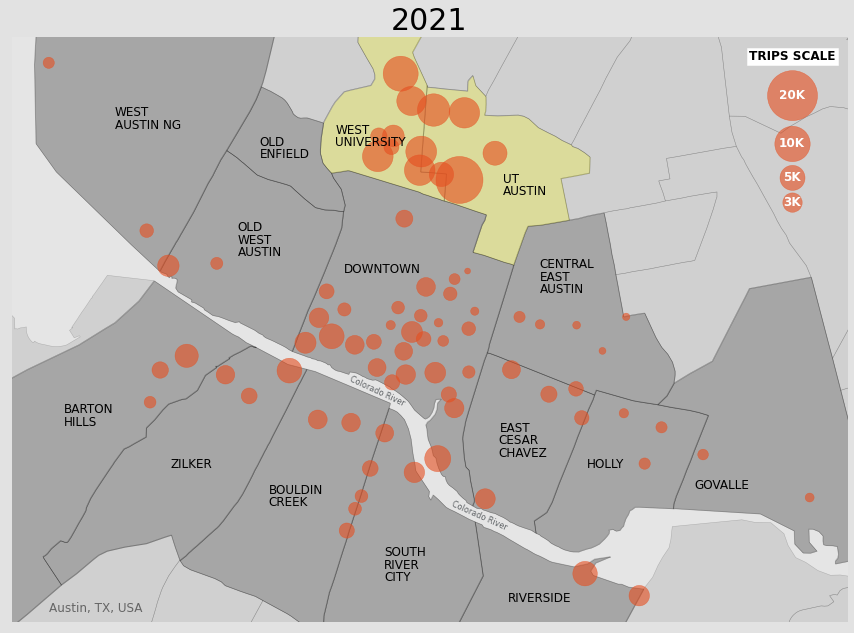

In [44]:
markersize = result['All Rides']/msize_divby

fig,ax = plt.subplots(figsize = (15,15))
base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="gray",edgecolor='black')

color_dark_gray = '#5A5A5A'

# Neighborhoods
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.25, color='yellow',edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.25, color='yellow',edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')

kiosk_geo.plot(ax = ax, color=color_light,markersize=markersize, alpha=0.60)

ax.set_xlim(xlo,xhi)
ax.set_ylim(ylo,yhi)

xspace = (xhi-xlo)/5
ax.set_title(yr_txt,fontsize=30)

plt.text(-97.7326,30.2827,"UT",color='black', 
        fontsize = 12)
plt.text(-97.7326,30.2815,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.7515,30.2875,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7515,30.2863,"UNIVERSITY",color='black', 
        fontsize = 12)
plt.text(-97.7505,30.274,"DOWNTOWN",color='black', 
        fontsize = 12)
plt.text(-97.732,30.242,"RIVERSIDE",color='black', 
        fontsize = 12)
plt.text(-97.733,30.2585,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2573,"CESAR",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2561,"CHAVEZ",color='black', 
        fontsize = 12)
plt.text(-97.7231,30.2550,"HOLLY",color='black', 
        fontsize = 12)
plt.text(-97.711,30.253,"GOVALLE",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2744,"CENTRAL",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2732,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2720,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.760,30.2863,"OLD",color='black', 
        fontsize = 12)
plt.text(-97.760,30.2851,"ENFIELD",color='black', 
        fontsize = 12)
plt.text(-97.770,30.255,"ZILKER",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2780,"OLD",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2768,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2756,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.782,30.2603,"BARTON",color='black', 
        fontsize = 12)
plt.text(-97.782,30.2591,"HILLS",color='black', 
        fontsize = 12)
plt.text(-97.759,30.2525,"BOULDIN",color='black', 
        fontsize = 12)
plt.text(-97.759,30.2513,"CREEK",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2464,"SOUTH",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2452,"RIVER",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2440,"CITY",color='black', 
        fontsize = 12)
plt.text(-97.7763,30.2892,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7763,30.2880,"AUSTIN NG",color='black', 
        fontsize = 12)
plt.text(-97.7500,30.26105,"Colorado River",color='#606467', 
        fontsize = 8, rotation = -25)
plt.text(-97.7385,30.24895,"Colorado River",color='#606467', 
        fontsize = 8, rotation = -24)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

fig.patch.set_facecolor('#e2e2e2')
ax.spines['left'].set_color('#e2e2e2') 
ax.spines['right'].set_color('#e2e2e2') 
ax.spines['bottom'].set_color('#e2e2e2') 
ax.spines['top'].set_color('#e2e2e2') 

plt.text(xlo+(xspace*0.79),ylo+0.0010,"Austin, TX, USA",color='#656565', 
        fontsize = 12, horizontalalignment='right')

# Create legend
legdf_geo.plot(ax = ax, color=color_light,markersize=legdf_geo['All Rides']/msize_divby, alpha=0.60)
plt.text(-97.700,30.2900+0.005,"TRIPS SCALE",color='black', backgroundcolor = 'white', va='center', ha='center',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7001,30.2808,"3K",color='white', va='center', ha='center', weight = 'bold',
        fontsize = 12, rotation = 0)
plt.text(-97.7001,30.2832,"5K",color='white', va='center', ha='center', weight = 'bold',
        fontsize = 12, rotation = 0)
plt.text(-97.7001,30.2865,"10K",color='white', va='center', ha='center', weight = 'bold',
        fontsize = 12, rotation = 0)
plt.text(-97.7001,30.2912,"20K",color='white', va='center', ha='center', weight = 'bold',
        fontsize = 12, rotation = 0)

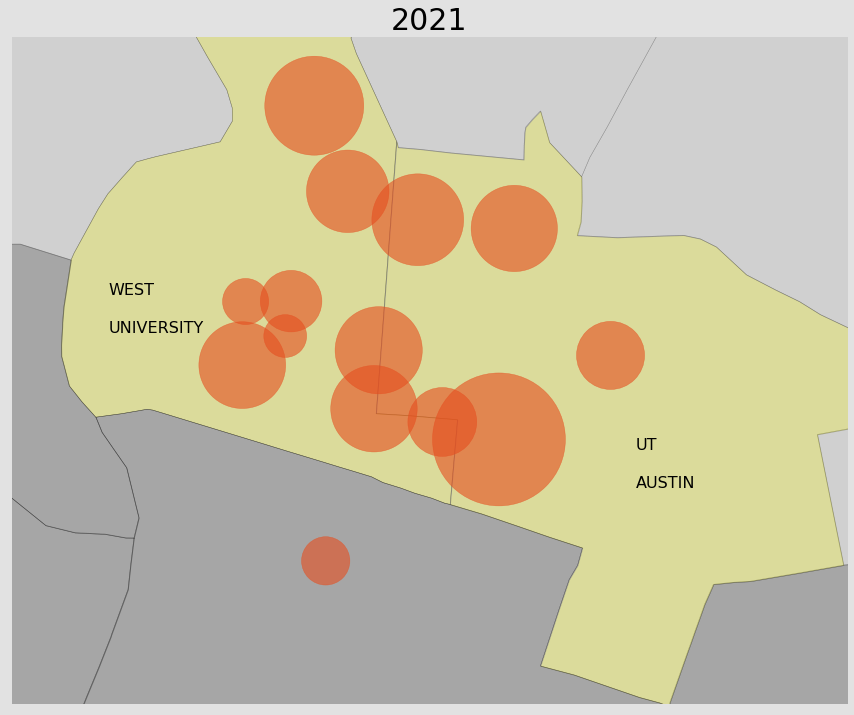

In [45]:
markersize = result['All Rides']

fig,ax = plt.subplots(figsize = (15,15))
base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="gray",edgecolor='black')

color_dark_gray = '#5A5A5A'

# Neighborhoods
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.25, color='yellow',edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.25, color='yellow',edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')

kiosk_geo.plot(ax = ax, color=color_light,markersize=markersize, alpha=0.60)

ax.set_xlim(-97.755,-97.725)
ax.set_ylim(30.2748,30.2955)

xspace = (xhi-xlo)/5
ax.set_title(yr_txt,fontsize=30)

plt.text(-97.7326,30.2827,"UT",color='black', 
        fontsize = 16)
plt.text(-97.7326,30.2815,"AUSTIN",color='black', 
        fontsize = 16)
plt.text(-97.7515,30.2875,"WEST",color='black', 
        fontsize = 16)
plt.text(-97.7515,30.2863,"UNIVERSITY",color='black', 
        fontsize = 16)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

fig.patch.set_facecolor('#e2e2e2')
ax.spines['left'].set_color('#e2e2e2') 
ax.spines['right'].set_color('#e2e2e2') 
ax.spines['bottom'].set_color('#e2e2e2') 
ax.spines['top'].set_color('#e2e2e2') 

### Figure 9 Map - 2022

In [46]:
yr_txt = '2022'

In [47]:
trips_temp = trips_2022
trips_Student = trips_temp.loc[trips_temp['Membership Type']=='Student']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Student.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Student Rides'}, 
                             inplace = True)
trips_Annual = trips_temp.loc[trips_temp['Membership Type']=='Annual']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Annual.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Annual Rides'}, 
                             inplace = True)
trips_Monthly = trips_temp.loc[trips_temp['Membership Type']=='Monthly']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Monthly.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Monthly Rides'}, 
                             inplace = True)
trips_Day = trips_temp.loc[trips_temp['Membership Type']=='Day']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Day.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Day Rides'}, 
                             inplace = True)
trips_SingleRide = trips_temp.loc[trips_temp['Membership Type']=='Single Ride']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_SingleRide.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Single Rides'}, 
                             inplace = True)
trips_Weekend = trips_temp.loc[trips_temp['Membership Type']=='3-Day Weekend']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Weekend.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Weekend Rides'}, 
                             inplace = True)
trips_Other = trips_temp.loc[trips_temp['Membership Type']=='Other']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Other.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Other Rides'}, 
                             inplace = True)
trips_all = trips_temp['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_all.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'All Rides'}, 
                             inplace = True)

test_kiosks = kiosk_geo['Kiosk ID'].to_frame()
result0 = test_kiosks.merge(trips_Student, how = "left", on=["Kiosk ID","Kiosk ID"])
result1 = result0.merge(trips_Annual, how = "left", on=["Kiosk ID","Kiosk ID"])
result2 = result1.merge(trips_Monthly, how = "left", on=["Kiosk ID","Kiosk ID"])
result3 = result2.merge(trips_Day, how = "left", on=["Kiosk ID","Kiosk ID"])
result4 = result3.merge(trips_SingleRide, how = "left", on=["Kiosk ID","Kiosk ID"])
result5 = result4.merge(trips_Weekend, how = "left", on=["Kiosk ID","Kiosk ID"])
result6 = result5.merge(trips_Other, how = "left", on=["Kiosk ID","Kiosk ID"])
result = result6.merge(trips_all, how = "left", on=["Kiosk ID","Kiosk ID"])

result.head(10)

,Kiosk ID,Student Rides,Annual Rides,Monthly Rides,Day Rides,Single Rides,Weekend Rides,Other Rides,All Rides
0,2823,19.0,489.0,281.0,117.0,110.0,NaN,NaN,1118.0
1,3291,48.0,243.0,158.0,154.0,89.0,NaN,NaN,833.0
2,3292,40.0,538.0,328.0,193.0,154.0,NaN,NaN,1401.0
3,3293,28.0,112.0,165.0,215.0,133.0,NaN,NaN,933.0
4,3294,199.0,229.0,212.0,127.0,95.0,NaN,NaN,967.0
5,3377,369.0,417.0,305.0,815.0,609.0,NaN,NaN,2757.0
6,3513,110.0,511.0,525.0,744.0,474.0,NaN,NaN,2877.0
7,3660,313.0,1358.0,716.0,329.0,315.0,NaN,NaN,3401.0
8,3684,179.0,271.0,326.0,766.0,570.0,NaN,NaN,2622.0
9,3685,315.0,401.0,612.0,191.0,163.0,NaN,NaN,1824.0


Text(-97.7001, 30.2912, '20K')

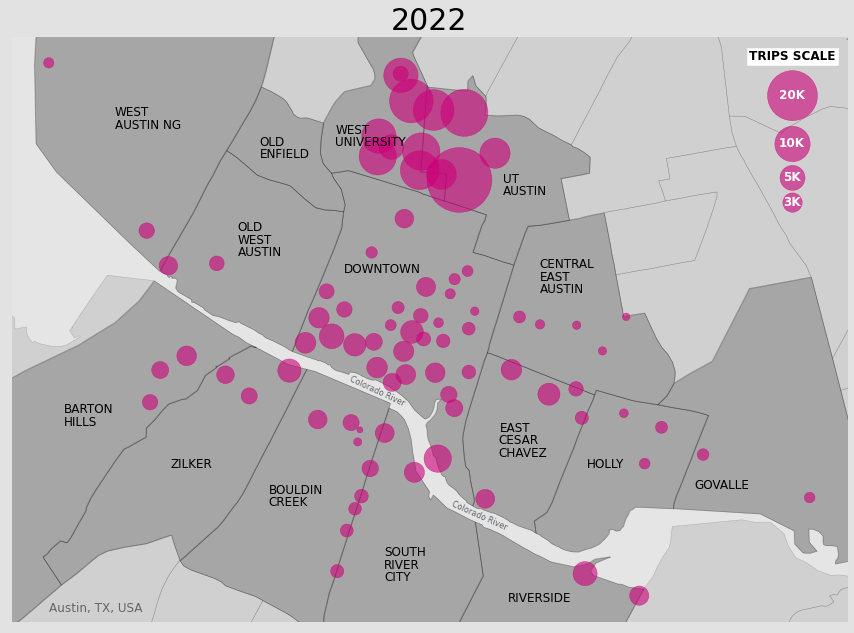

In [48]:
markersize = result['All Rides']/msize_divby

fig,ax = plt.subplots(figsize = (15,15))
base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="gray",edgecolor='black')

color_dark_gray = '#5A5A5A'

# Neighborhoods
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')

kiosk_geo.plot(ax = ax, color=color_dark,markersize=markersize, alpha=0.60)

ax.set_xlim(xlo,xhi)
ax.set_ylim(ylo,yhi)

xspace = (xhi-xlo)/5
ax.set_title(yr_txt,fontsize=30)

plt.text(-97.7326,30.2827,"UT",color='black', 
        fontsize = 12)
plt.text(-97.7326,30.2815,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.7515,30.2875,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7515,30.2863,"UNIVERSITY",color='black', 
        fontsize = 12)
plt.text(-97.7505,30.274,"DOWNTOWN",color='black', 
        fontsize = 12)
plt.text(-97.732,30.242,"RIVERSIDE",color='black', 
        fontsize = 12)
plt.text(-97.733,30.2585,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2573,"CESAR",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2561,"CHAVEZ",color='black', 
        fontsize = 12)
plt.text(-97.7231,30.2550,"HOLLY",color='black', 
        fontsize = 12)
plt.text(-97.711,30.253,"GOVALLE",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2744,"CENTRAL",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2732,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2720,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.760,30.2863,"OLD",color='black', 
        fontsize = 12)
plt.text(-97.760,30.2851,"ENFIELD",color='black', 
        fontsize = 12)
plt.text(-97.770,30.255,"ZILKER",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2780,"OLD",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2768,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2756,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.782,30.2603,"BARTON",color='black', 
        fontsize = 12)
plt.text(-97.782,30.2591,"HILLS",color='black', 
        fontsize = 12)
plt.text(-97.759,30.2525,"BOULDIN",color='black', 
        fontsize = 12)
plt.text(-97.759,30.2513,"CREEK",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2464,"SOUTH",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2452,"RIVER",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2440,"CITY",color='black', 
        fontsize = 12)
plt.text(-97.7763,30.2892,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7763,30.2880,"AUSTIN NG",color='black', 
        fontsize = 12)
plt.text(-97.7500,30.26105,"Colorado River",color='#606467', 
        fontsize = 8, rotation = -25)
plt.text(-97.7385,30.24895,"Colorado River",color='#606467', 
        fontsize = 8, rotation = -24)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

fig.patch.set_facecolor('#e2e2e2')
ax.spines['left'].set_color('#e2e2e2') 
ax.spines['right'].set_color('#e2e2e2') 
ax.spines['bottom'].set_color('#e2e2e2') 
ax.spines['top'].set_color('#e2e2e2') 

plt.text(xlo+(xspace*0.79),ylo+0.0010,"Austin, TX, USA",color='#656565', 
        fontsize = 12, horizontalalignment='right')

# Create legend
legdf_geo.plot(ax = ax, color=color_dark,markersize=legdf_geo['All Rides']/msize_divby, alpha=0.60)
plt.text(-97.700,30.2900+0.005,"TRIPS SCALE",color='black', backgroundcolor = 'white', va='center', ha='center',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7001,30.2808,"3K",color='white', va='center', ha='center', weight = 'bold',
        fontsize = 12, rotation = 0)
plt.text(-97.7001,30.2832,"5K",color='white', va='center', ha='center', weight = 'bold',
        fontsize = 12, rotation = 0)
plt.text(-97.7001,30.2865,"10K",color='white', va='center', ha='center', weight = 'bold',
        fontsize = 12, rotation = 0)
plt.text(-97.7001,30.2912,"20K",color='white', va='center', ha='center', weight = 'bold',
        fontsize = 12, rotation = 0)

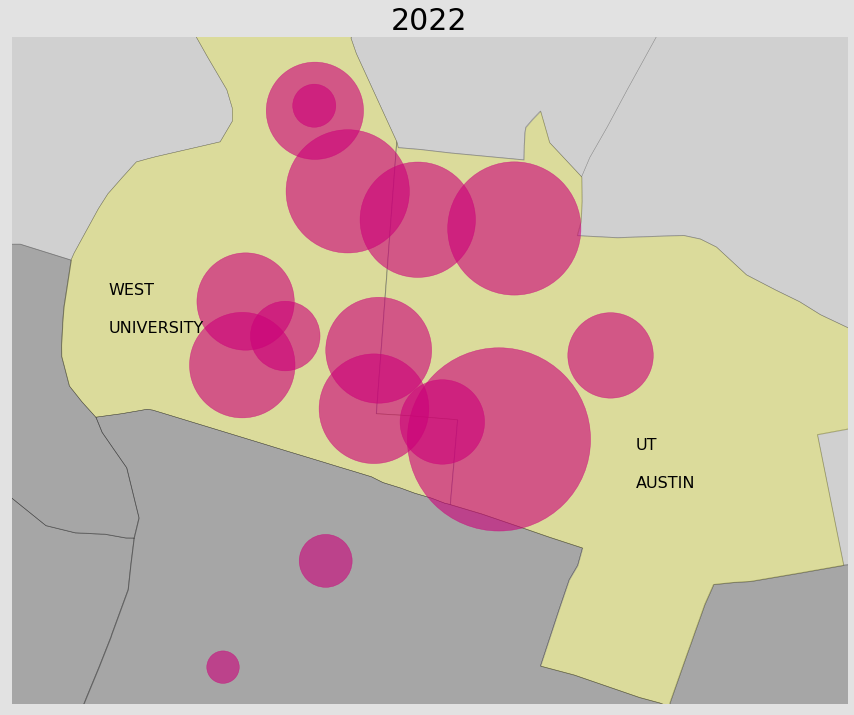

In [49]:
markersize = result['All Rides']

fig,ax = plt.subplots(figsize = (15,15))
base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="gray",edgecolor='black')

color_dark_gray = '#5A5A5A'

# Neighborhoods
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.25, color='yellow',edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.25, color='yellow',edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')

kiosk_geo.plot(ax = ax, color=color_dark,markersize=markersize, alpha=0.60)

ax.set_xlim(-97.755,-97.725)
ax.set_ylim(30.2748,30.2955)

xspace = (xhi-xlo)/5
ax.set_title(yr_txt,fontsize=30)

plt.text(-97.7326,30.2827,"UT",color='black', 
        fontsize = 16)
plt.text(-97.7326,30.2815,"AUSTIN",color='black', 
        fontsize = 16)
plt.text(-97.7515,30.2875,"WEST",color='black', 
        fontsize = 16)
plt.text(-97.7515,30.2863,"UNIVERSITY",color='black', 
        fontsize = 16)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

fig.patch.set_facecolor('#e2e2e2')
ax.spines['left'].set_color('#e2e2e2') 
ax.spines['right'].set_color('#e2e2e2') 
ax.spines['bottom'].set_color('#e2e2e2') 
ax.spines['top'].set_color('#e2e2e2') 

# Trying something

In [50]:
trips_2022.head()

,Unnamed: 0,Trip ID,Membership Name,Bicycle ID,Bike Type,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month_orig,Year_orig,Checkout DateTime,Return DateTime,Year,Month,Weekday,Weekday_name,Checkout_Hour,Checkout_Min,Membership Type,Lat Checkout,Lon Checkout,Council District Checkout,Neighborhood Checkout,Lat Return,Lon Return,Council District Return,Neighborhood Return,Distance_Miles
71191,71191,27348288,Local365,18266,NaN,07/31/2022,13:39:37,2707.0,Rainey/Cummings,2495.0,4th/Congress,7,NaN,NaN,2022-07-31 13:39:37,2022-07-31 13:46:37,2022,7,7,Sunday,13,39,Annual,30.255906,-97.739949,9.0,DOWNTOWN,30.266340,-97.743780,9.0,DOWNTOWN,0.756305
71545,71545,27349126,Local365,21723,NaN,07/31/2022,14:48:22,2495.0,4th/Congress,2707.0,Rainey/Cummings,6,NaN,NaN,2022-07-31 14:48:22,2022-07-31 14:54:22,2022,7,7,Sunday,14,48,Annual,30.266340,-97.743780,9.0,DOWNTOWN,30.255906,-97.739949,9.0,DOWNTOWN,0.756305
289173,289173,27348740,Student Membership,19943.0,NaN,07/31/2022,14:17:23,7188.0,22nd/Pearl,7189.0,28th/Rio,6,NaN,NaN,2022-07-31 14:17:23,2022-07-31 14:23:23,2022,7,7,Sunday,14,17,Student,30.285300,-97.746700,9.0,WEST UNIVERSITY,30.293173,-97.744097,9.0,WEST UNIVERSITY,0.565709
865941,865941,27350240,Student Membership,385,NaN,07/31/2022,16:33:43,7188.0,22nd/Pearl,7189.0,28th/Rio,8,NaN,NaN,2022-07-31 16:33:43,2022-07-31 16:41:43,2022,7,7,Sunday,16,33,Student,30.285300,-97.746700,9.0,WEST UNIVERSITY,30.293173,-97.744097,9.0,WEST UNIVERSITY,0.565709
1395846,1395846,27347193,Student Membership,19314,NaN,07/31/2022,11:55:45,3790.0,Lake Austin Blvd/Deep Eddy,2498.0,Dean Keeton/Speedway,22,NaN,NaN,2022-07-31 11:55:45,2022-07-31 12:17:45,2022,7,7,Sunday,11,55,Student,30.278070,-97.772720,10.0,WEST AUSTIN NG,30.289530,-97.736950,9.0,UT AUSTIN,2.276360


In [51]:
trips_temp = trips_2022
trips_Student = trips_temp.loc[trips_temp['Membership Type']=='Student']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Student.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Student Rides'}, 
                             inplace = True)
trips_Annual = trips_temp.loc[trips_temp['Membership Type']=='Annual']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Annual.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Annual Rides'}, 
                             inplace = True)
trips_Monthly = trips_temp.loc[trips_temp['Membership Type']=='Monthly']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Monthly.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Monthly Rides'}, 
                             inplace = True)
trips_Day = trips_temp.loc[trips_temp['Membership Type']=='Day']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Day.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Day Rides'}, 
                             inplace = True)
trips_SingleRide = trips_temp.loc[trips_temp['Membership Type']=='Single Ride']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_SingleRide.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Single Rides'}, 
                             inplace = True)
trips_Weekend = trips_temp.loc[trips_temp['Membership Type']=='Weekend']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Weekend.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Weekend Rides'}, 
                             inplace = True)
trips_Other = trips_temp.loc[trips_temp['Membership Type']=='Other']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Other.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Other Rides'}, 
                             inplace = True)

trips_Weekly = trips_temp.loc[trips_temp['Membership Type']=='Weekly']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Weekly.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Weekly Rides'}, 
                             inplace = True)

trips_all = trips_temp['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_all.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'All Rides'}, 
                             inplace = True)

test_kiosks = kiosk_geo['Kiosk ID'].to_frame()
result0 = test_kiosks.merge(trips_Student, how = "left", on=["Kiosk ID","Kiosk ID"])
result1 = result0.merge(trips_SingleRide, how = "left", on=["Kiosk ID","Kiosk ID"])
result2 = result1.merge(trips_Annual, how = "left", on=["Kiosk ID","Kiosk ID"])
result3 = result2.merge(trips_Day, how = "left", on=["Kiosk ID","Kiosk ID"])
result4 = result3.merge(trips_Monthly, how = "left", on=["Kiosk ID","Kiosk ID"])
result5 = result4.merge(trips_Weekend, how = "left", on=["Kiosk ID","Kiosk ID"])
result6 = result5.merge(trips_Other, how = "left", on=["Kiosk ID","Kiosk ID"])
result7 = result6.merge(trips_Weekly, how = "left", on=["Kiosk ID","Kiosk ID"])
result = result7.merge(trips_all, how = "left", on=["Kiosk ID","Kiosk ID"])

result.head(10)

,Kiosk ID,Student Rides,Single Rides,Annual Rides,Day Rides,Monthly Rides,Weekend Rides,Other Rides,Weekly Rides,All Rides
0,2823,19.0,110.0,489.0,117.0,281.0,102.0,NaN,NaN,1118.0
1,3291,48.0,89.0,243.0,154.0,158.0,141.0,NaN,NaN,833.0
2,3292,40.0,154.0,538.0,193.0,328.0,148.0,NaN,NaN,1401.0
3,3293,28.0,133.0,112.0,215.0,165.0,280.0,NaN,NaN,933.0
4,3294,199.0,95.0,229.0,127.0,212.0,105.0,NaN,NaN,967.0
5,3377,369.0,609.0,417.0,815.0,305.0,242.0,NaN,NaN,2757.0
6,3513,110.0,474.0,511.0,744.0,525.0,513.0,NaN,NaN,2877.0
7,3660,313.0,315.0,1358.0,329.0,716.0,370.0,NaN,NaN,3401.0
8,3684,179.0,570.0,271.0,766.0,326.0,510.0,NaN,NaN,2622.0
9,3685,315.0,163.0,401.0,191.0,612.0,142.0,NaN,NaN,1824.0


In [52]:
result_last = result[['Kiosk ID']].copy()
result_last['Student Prct'] = result["Student Rides"].div(result["All Rides"], axis=0)*100
result_last['Single Prct'] = result["Single Rides"].div(result["All Rides"], axis=0)*100
result_last['Annual Prct'] = result["Annual Rides"].div(result["All Rides"], axis=0)*100
result_last['Day Prct'] = result["Day Rides"].div(result["All Rides"], axis=0)*100
result_last['Monthly Prct'] = result["Monthly Rides"].div(result["All Rides"], axis=0)*100
result_last['Weekend Prct'] = result["Weekend Rides"].div(result["All Rides"], axis=0)*100
result_last['Other Prct'] = result["Other Rides"].div(result["All Rides"], axis=0)*100
result_last['Weekly Prct'] = result["Weekly Rides"].div(result["All Rides"], axis=0)*100

In [53]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

KeyboardInterrupt: 

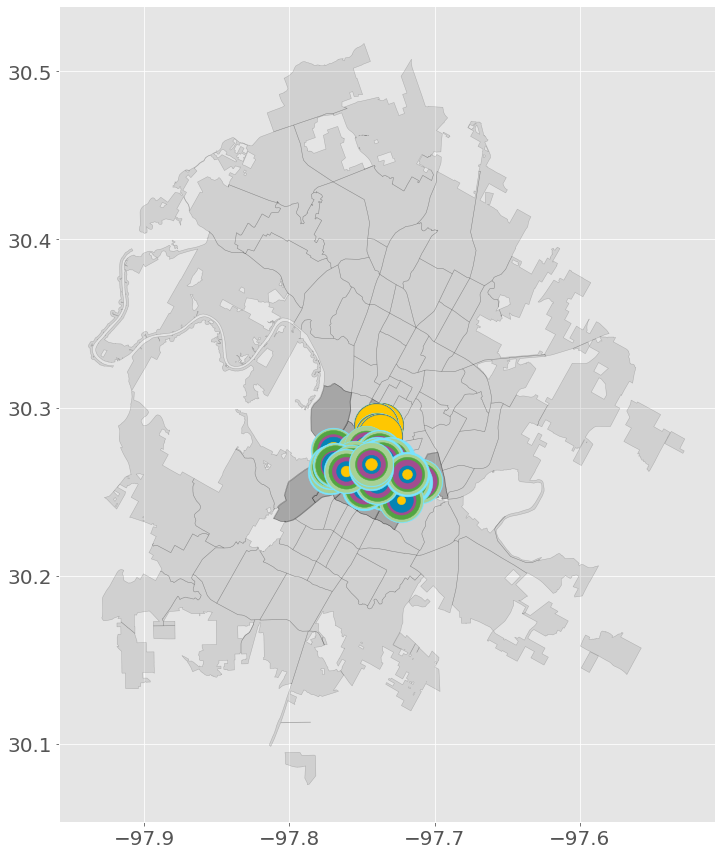

In [54]:
fig,ax = plt.subplots(figsize = (15,15))
base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="gray",edgecolor='black')

color_dark_gray = '#5A5A5A'

# Neighborhoods
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')

# ----------------------------------------------------------
# This is the Data here
# ----------------------------------------------------------
cnt = 0
for kiosk_id in result['Kiosk ID']:
    #print("Kiosk ID: ", kiosk_id)
    #print(cnt)
    # a row of data
    trow = result_last.loc[result_last['Kiosk ID']==kiosk_id].reset_index(drop=True).T.reset_index()
    
    trow_min = trow[1:8]
    #print(trow_min)
    trow_min.rename(columns = {'index':'Info',
                      0:'Trips'}, inplace = True)
    temp = trow_min.loc[trow_min['Trips'].notnull()].reset_index().sort_values(by = ["index"], ascending=False).reset_index(drop=True)
    #print(temp)
    
    for trips, info, indx in zip(temp['Trips'],temp['Info'], temp['index']):
        #print(trips)
        #print(info)
        
        msize = (temp.loc[temp['index'] <= indx, 'Trips'].sum())*20
        #print(msize/10)
        markercolor = 'red' # testing
        
        if 'Student' in info:
            markercolor = color_Student
            #print('Student')
        elif 'Annual' in info:
            markercolor = color_Annual
            #print('Annual')
        elif 'Monthly' in info:
            markercolor = color_Monthly
            #print('Monthly')
        elif 'Day' in info:
            markercolor = color_Day
            #print('Day')
        elif 'Single' in info:
            markercolor = color_SingleRide
            #print('Single Ride')
        elif 'Weekend' in info:
            markercolor = color_Weekend
            #print('Weekend')
        elif 'Other' in info:
            markercolor = color_Other 
            #print('Other')
        elif 'Weekly' in info:
            markercolor = color_Weekly     
            #print('Weekly')
            
        #print(msize)
        kiosk_geo.loc[kiosk_geo['Kiosk ID']==kiosk_id].plot(ax = ax, color=markercolor, markersize=msize, alpha=1)

    cnt +=1
    
    #if cnt >=10:
        #break
    
# ----------------------------------------------------------

ax.set_xlim(xlo,xhi)
ax.set_ylim(ylo,yhi)

xspace = (xhi-xlo)/5
ax.set_title(yr_txt,fontsize=30)

plt.text(-97.7326,30.2817,"UT",color='black', 
        fontsize = 12)
plt.text(-97.7326,30.2805,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.7515,30.2875,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7515,30.2863,"UNIVERSITY",color='black', 
        fontsize = 12)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

fig.patch.set_facecolor('#e2e2e2')
ax.spines['left'].set_color('#e2e2e2') 
ax.spines['right'].set_color('#e2e2e2') 
ax.spines['bottom'].set_color('#e2e2e2') 
ax.spines['top'].set_color('#e2e2e2') 


# Trying more stuff

In [55]:
trips.head()

AttributeError: 'float' object has no attribute 'head'